In [1]:
import pandas as pd

In [2]:
# Define the file path
modeling_file_path = "KSV_Gex_Reduced.csv"
# Load the CSV file into a DataFrame
df_modeling = pd.read_csv(modeling_file_path)
# Set 'SampleID' as the index
df_modeling.set_index('SampleID', inplace=True)

# Define the file path
correlations_file_path = "average_correlation_matrix.csv"
# Load the CSV file into a DataFrame
df_correlations = pd.read_csv(correlations_file_path)

# Define the file path
distances_file_path = "average_gene_distance_matrix.csv"
# Load the CSV file into a DataFrame
df_distances = pd.read_csv(distances_file_path)

In [3]:
df_modeling.head()

,Cluster,K1,K3,Orf70,K4,K5,K7,Orf16,Orf17,Orf18,...,Orf65,Orf66,Orf67,Orf68,Orf69,LANA,K14,Orf11,K15,K2
SampleID,,,,,,,,,,,,,,,,,,,,,
180,1,-1.415987,-0.733408,-2.356423,-2.755006,-2.341402,-2.555724,-5.406533,1.120814,-3.364880,...,-11.893126,-6.748318,-6.743363,-0.159173,2.855573,-1.528707,-5.867100,-7.532113,-0.858643,0.474952
220,1,-1.415987,3.689511,-2.356423,-2.968253,7.777975,-14.070594,-5.406533,-3.939122,7.339368,...,-6.034372,-8.609888,-4.784115,0.436870,-17.939168,-11.409154,-5.605035,-8.962736,-7.291090,-7.034789
225,1,-0.230971,-2.868305,-1.171407,-1.783236,-4.401256,-1.225577,-4.221517,-2.754105,-2.179863,...,-13.327850,-2.688942,-5.558347,4.542639,-1.259151,3.769465,2.906796,-3.141967,3.912528,-5.849773
316,2,-1.415987,4.446147,8.172779,8.500950,5.727930,13.578608,5.408068,1.370480,-3.364880,...,7.776335,3.445358,-3.628762,1.032224,4.660035,-1.106110,1.754931,8.037219,-1.586967,8.304413
541,1,-0.439120,-1.409788,-2.356423,-1.024719,5.249028,-2.225293,-5.406533,-0.391321,-3.364880,...,-2.882266,-2.636472,-2.768063,-0.393743,-6.438867,1.091869,-5.371745,4.498618,-0.826127,3.635812


In [4]:
# Normalize each sample (row-wise normalization)
df_modeling_normalized = df_modeling.div(df_modeling.sum(axis=1), axis=0)

# Display the first few rows of the normalized DataFrame
df_modeling_normalized.head()

,Cluster,K1,K3,Orf70,K4,K5,K7,Orf16,Orf17,Orf18,...,Orf65,Orf66,Orf67,Orf68,Orf69,LANA,K14,Orf11,K15,K2
SampleID,,,,,,,,,,,,,,,,,,,,,
180,-0.006594,0.009337,0.004836,0.015538,0.018166,0.015439,0.016852,0.035649,-0.007390,0.022187,...,0.078420,0.044497,0.044464,0.001050,-0.018829,0.010080,0.038686,0.049665,0.005662,-0.003132
220,-0.003351,0.004745,-0.012364,0.007897,0.009947,-0.026065,0.047153,0.018118,0.013201,-0.024595,...,0.020222,0.028853,0.016032,-0.001464,0.060117,0.038234,0.018783,0.030035,0.024433,0.023575
225,-0.007128,0.001646,0.020444,0.008349,0.012710,0.031371,0.008736,0.030090,0.019630,0.015537,...,0.094997,0.019166,0.039618,-0.032379,0.008975,-0.026868,-0.020719,0.022395,-0.027887,0.041695
316,0.007441,-0.005268,0.016541,0.030406,0.031627,0.021310,0.050517,0.020120,0.005099,-0.012519,...,0.028931,0.012818,-0.013500,0.003840,0.017337,-0.004115,0.006529,0.029901,-0.005904,0.030895
541,-0.009267,0.004069,0.013064,0.021837,0.009496,-0.048642,0.020622,0.050102,0.003626,0.031182,...,0.026710,0.024432,0.025651,0.003649,0.059668,-0.010118,0.049779,-0.041688,0.007656,-0.033693


# Aim 3

In [5]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Define X (gene expression matrix) and y (cluster labels)
X = df_modeling.drop(columns=["Cluster"])  # Gene expression matrix
y = df_modeling["Cluster"]  # Cluster labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Use Recursive Feature Elimination (RFE) to select the most important features
rfe = RFE(estimator=clf, n_features_to_select=14)  # Select top 14 genes
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features (Genes):", selected_features)

# Train the model with the selected features
clf.fit(X_train[selected_features], y_train)

# Predict on the test set
y_pred = clf.predict(X_test[selected_features])

# Evaluate the model
print(classification_report(y_test, y_pred))

Selected Features (Genes): Index(['K7', 'Orf16', 'Orf17', 'Orf23', 'Orf25', 'Orf27', 'Orf6', 'Orf34',
       'Orf7', 'Orf8', 'Orf50', 'Orf9', 'Orf10', 'Orf11'],
      dtype='object')
              precision    recall  f1-score   support

           1       0.89      1.00      0.94         8
           2       1.00      0.67      0.80         3

    accuracy                           0.91        11
   macro avg       0.94      0.83      0.87        11
weighted avg       0.92      0.91      0.90        11



- The goal is to classify KS subtypes using gene expression data.
- Uses Recursive Feature Elimination (RFE) with Random Forest Classifier to find the 14 most important genes.
- Selected Genes
    - The model identified the 14 most predictive genes:
        - ['K7', 'Orf16', 'Orf17', 'Orf23', 'Orf25', 'Orf27', 'Orf6', 'Orf34', 'Orf7', 'Orf8', 'Orf50', 'Orf9', 'Orf10', 'Orf11']
    - These genes are likely important for distinguishing KS subtypes.
- Classification Performance
    - Cluster 1 (Majority Class)
        - Precision: 0.89 (89% of predicted cluster 1 samples are correct)
        - Recall: 1.00 (100% of actual cluster 1 samples were classified correctly)
        - F1-score: 0.94 (harmonic mean of precision & recall)
    - Cluster 2 (Minority Class)
        - Precision: 1.00 (All predicted cluster 2 samples were correct)
        - Recall: 0.67 (Only 67% of actual cluster 2 samples were classified correctly)
        - F1-score: 0.80 (lower than cluster 1 due to recall drop)
- Overall Model Accuracy
    - 91% accuracy, meaning the classifier correctly predicts KS subtype in 91% of test samples.
    - Macro average:
        - Precision: 0.94
        - Recall: 0.83
        - F1-score: 0.87


In [6]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import accuracy_score

# Initialize Lasso and Ridge models
lasso = Lasso(alpha=0.01, random_state=42, max_iter=10000)
ridge = Ridge(alpha=0.01, random_state=42)

# Fit Lasso model
lasso.fit(X_train, y_train)
lasso_selected_features = X.columns[lasso.coef_ != 0]
print("Lasso Selected Features:", lasso_selected_features)

# Fit Ridge model
ridge.fit(X_train, y_train)
ridge_selected_features = X.columns  # Ridge does not perform feature selection directly
print("Ridge Selected Features (all features are used):", ridge_selected_features)

# Evaluate RFE
rfe_y_pred = clf.predict(X_test[selected_features])
rfe_accuracy = accuracy_score(y_test, rfe_y_pred)
print("RFE Accuracy:", rfe_accuracy)

# Evaluate Lasso
lasso_y_pred = lasso.predict(X_test)
lasso_y_pred = [round(pred) for pred in lasso_y_pred]  # Convert predictions to nearest integer
lasso_accuracy = accuracy_score(y_test, lasso_y_pred)
print("Lasso Accuracy:", lasso_accuracy)

# Evaluate Ridge
ridge_y_pred = ridge.predict(X_test)
ridge_y_pred = [round(pred) for pred in ridge_y_pred]  # Convert predictions to nearest integer
ridge_accuracy = accuracy_score(y_test, ridge_y_pred)
print("Ridge Accuracy:", ridge_accuracy)

# Compare the number of features selected
print("Number of Features Selected by RFE:", len(selected_features))
print("Number of Features Selected by Lasso:", len(lasso_selected_features))
print("Number of Features Selected by Ridge (all features):", len(ridge_selected_features))

Lasso Selected Features: Index(['K1', 'K7', 'Orf4', 'Orf22', 'Orf6', 'Orf30', 'Orf37', 'Orf40', 'Orf43',
       'Orf46', 'Orf57', 'Orf58', 'Orf60', 'Orf61', 'Orf10', 'Orf65', 'Orf67',
       'K14', 'Orf11'],
      dtype='object')
Ridge Selected Features (all features are used): Index(['K1', 'K3', 'Orf70', 'K4', 'K5', 'K7', 'Orf16', 'Orf17', 'Orf18',
       'Orf4', 'Orf20', 'Orf21', 'Orf22', 'Orf23', 'Orf24', 'Orf25', 'Orf26',
       'Orf27', 'Orf6', 'Orf29', 'Orf30', 'Orf32', 'Orf34', 'Orf36', 'Orf37',
       'Orf7', 'Orf39', 'Orf40', 'Orf42', 'Orf43', 'Orf44', 'Orf45', 'Orf46',
       'Orf47', 'Orf8', 'Orf48', 'Orf49', 'Orf50', 'Orf52', 'Orf54', 'Orf55',
       'Orf56', 'Orf57', 'Orf9', 'vIRF1', 'vIRF4', 'vIRF2', 'Orf58', 'Orf59',
       'Orf60', 'Orf61', 'Orf62', 'Orf63', 'Orf10', 'Orf65', 'Orf66', 'Orf67',
       'Orf68', 'Orf69', 'LANA', 'K14', 'Orf11', 'K15', 'K2'],
      dtype='object')
RFE Accuracy: 0.9090909090909091
Lasso Accuracy: 1.0
Ridge Accuracy: 1.0
Number of Features Se

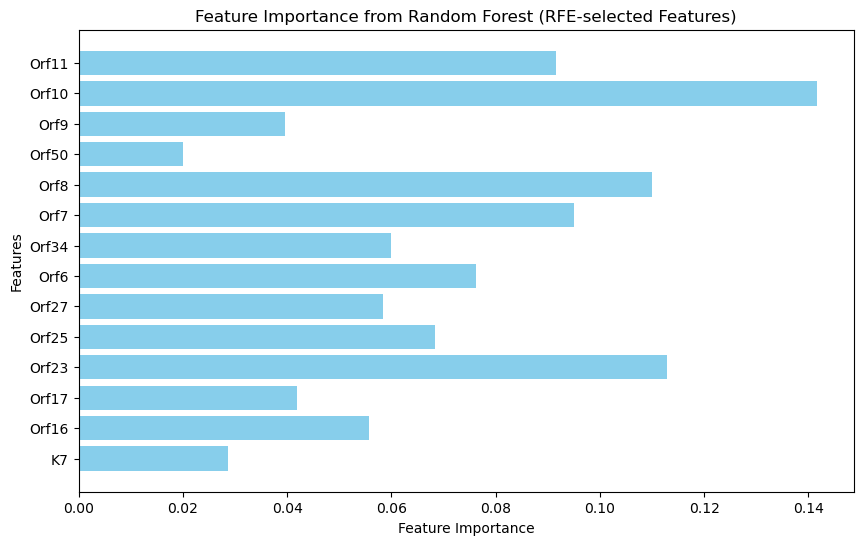

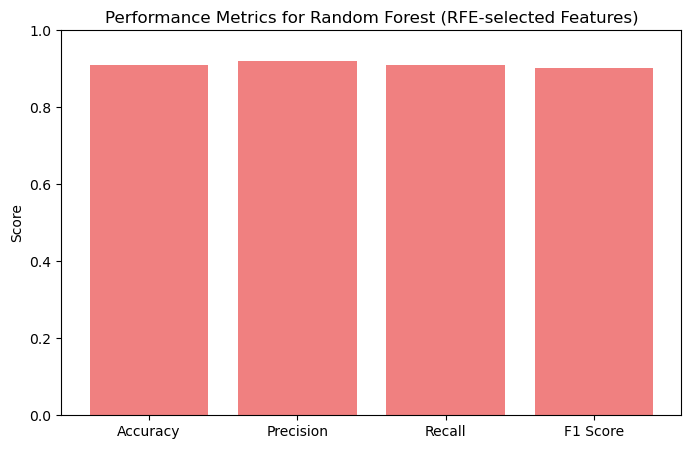

In [7]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt

# Train a Random Forest model using the RFE-selected features
clf_rfe = RandomForestClassifier(random_state=42)
clf_rfe.fit(X_train[selected_features], y_train)

# Predict on the test set
y_pred_rfe = clf_rfe.predict(X_test[selected_features])

# Calculate feature importances
feature_importances = clf_rfe.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(selected_features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest (RFE-selected Features)')
plt.show()

# Calculate performance metrics

accuracy = accuracy_score(y_test, y_pred_rfe)
precision = precision_score(y_test, y_pred_rfe, average='weighted')
recall = recall_score(y_test, y_pred_rfe, average='weighted')
f1 = f1_score(y_test, y_pred_rfe, average='weighted')

# Plot performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color='lightcoral')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Performance Metrics for Random Forest (RFE-selected Features)')
plt.show()

- Feature Importance Plot
    - Displays the relative importance of each gene in classifying KS subtypes.
    - Top important genes contribute the most to the decision-making process.
    - Orf10, Orf23, and Orf8 show high importance, indicating their strong association with KS subtype classification.
    - Less important genes (e.g., K7, Orf50) may contribute less but still improve classification.

- Performance Metrics
    - Accuracy (~91%): Model correctly predicts KS subtypes in most test samples.
    - Precision (~92%): High precision means the model's positive predictions are reliable.
    - Recall (~91%): The model captures most KS subtype cases.
    - F1 Score (~90%): Balanced measure showing strong overall performance.

- Strengths
    - The selected 14 genes provide high accuracy while reducing dimensionality.
    - Feature importance analysis helps identify key genes linked to KS subtypes.
    - Strong performance metrics confirm the model is effective.

- Weaknesses
    - Some genes have low feature importance, suggesting they may be less relevant for classification.
    - The recall imbalance seen earlier for Cluster 2 could still be an issue.

- Next Steps
    - Test alternative feature selection methods (LASSO, PCA) to validate gene selection.
    - Use other classifiers (SVM, GBM) for comparison.
    - Perform a deeper biological analysis on top-ranked genes to confirm their role in KS subtypes.

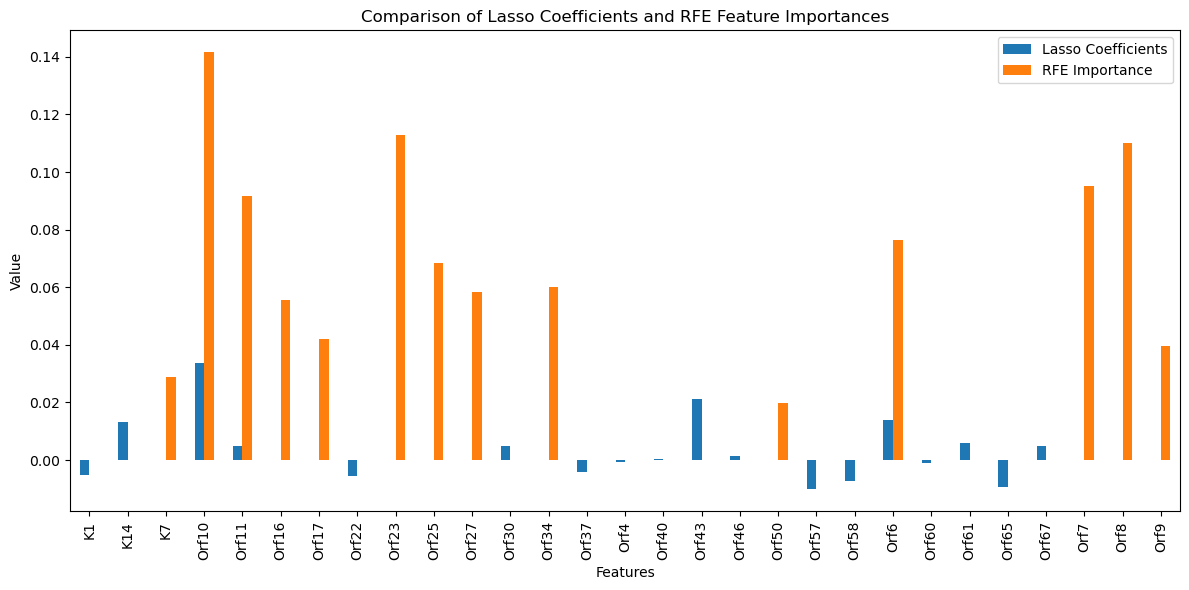

In [8]:
# Extract Lasso coefficients for the selected features
lasso_coefficients = lasso.coef_[lasso.coef_ != 0]

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Feature': selected_features.union(lasso_selected_features),
    'Lasso Coefficients': [lasso.coef_[X.columns.get_loc(feature)] if feature in lasso_selected_features else 0 for feature in selected_features.union(lasso_selected_features)],
    'RFE Importance': [feature_importances[selected_features.get_loc(feature)] if feature in selected_features else 0 for feature in selected_features.union(lasso_selected_features)]
})

# Plot the comparison
comparison_df.set_index('Feature').plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Lasso Coefficients and RFE Feature Importances')
plt.ylabel('Value')
plt.xlabel('Features')
plt.legend(['Lasso Coefficients', 'RFE Importance'])
plt.tight_layout()
plt.show()

- Comparison of LASSO and RFE Features
    - Some genes have high importance in both methods (e.g., Orf10, Orf6), suggesting they are strong markers for KS subtypes.
    - Other genes are highly ranked in one method but not the other, which could indicate:
    - Some genes may be redundant or correlated, affecting selection.

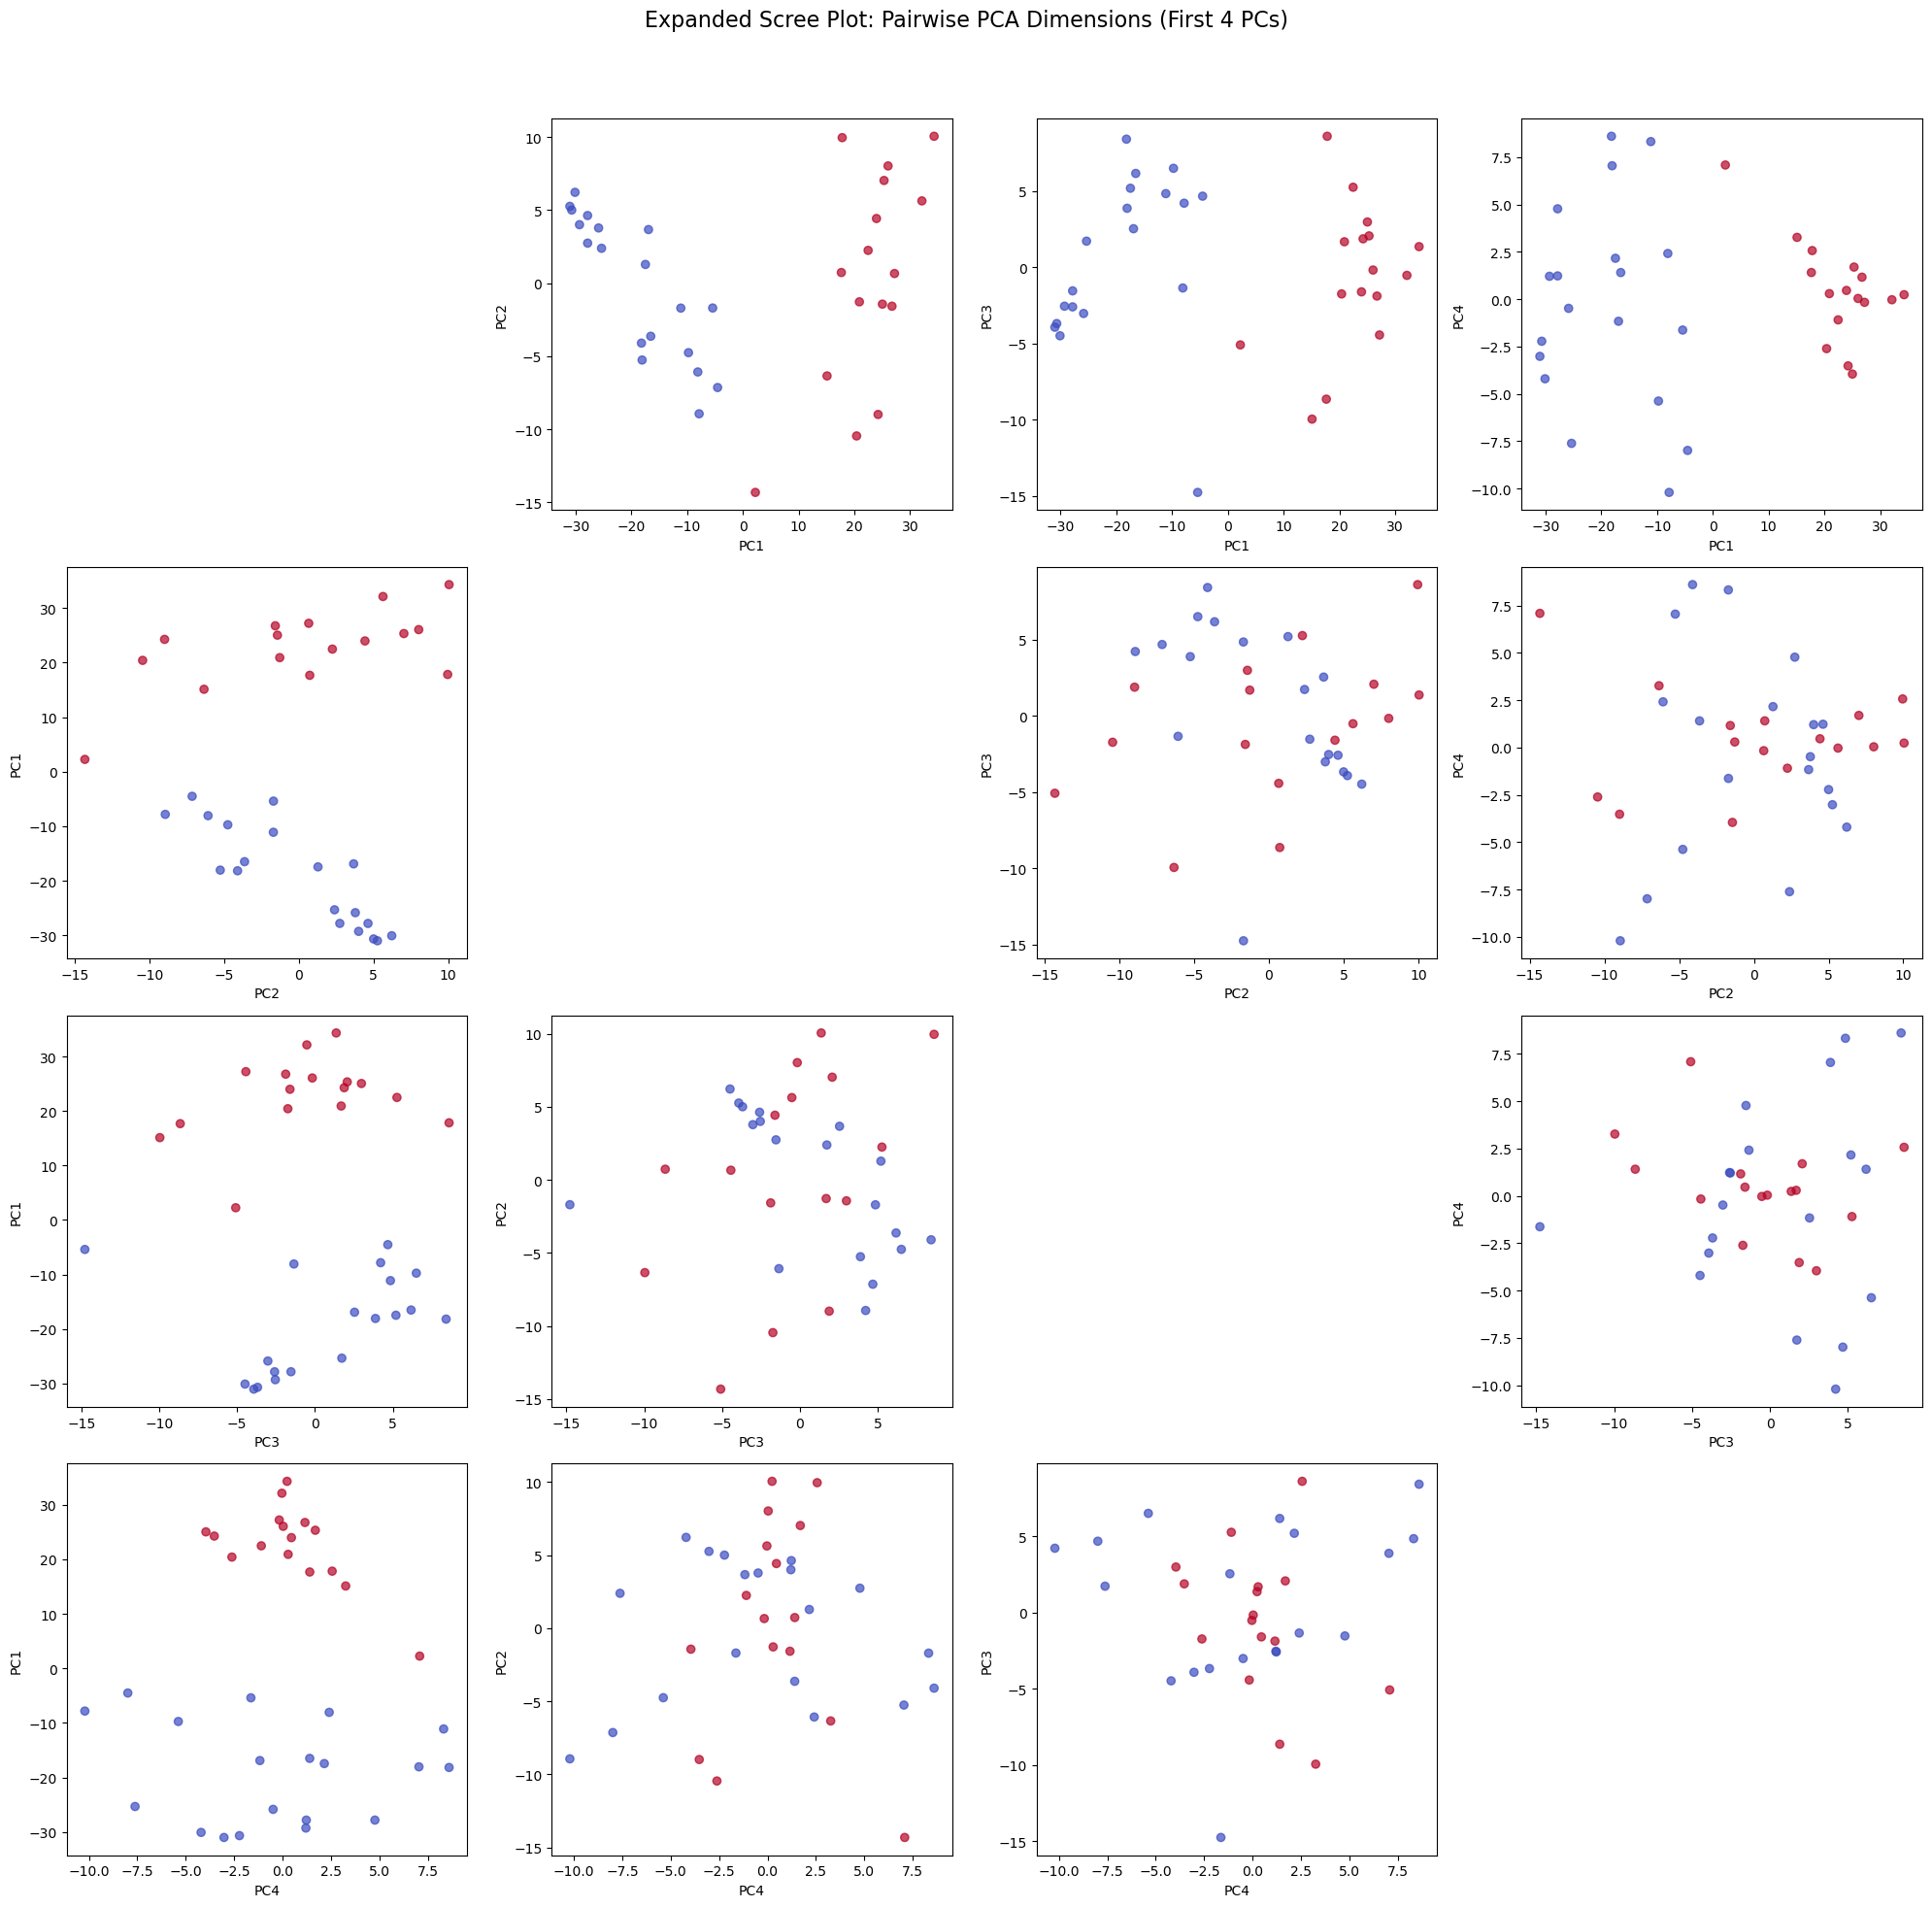

In [9]:
from sklearn.decomposition import PCA

# Perform PCA on the RFE-selected features
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X[selected_features])

# Create a DataFrame for the first 4 principal components
pca_df_first_four = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(4)])

# Get the number of principal components to consider
num_pcs = 4

# Create a grid of subplots
fig, axes = plt.subplots(num_pcs, num_pcs, figsize=(20, 20), sharex=False, sharey=False)
fig.suptitle('Expanded Scree Plot: Pairwise PCA Dimensions (First 4 PCs)', fontsize=16)

# Plot each PC dimension against each other
for i in range(num_pcs):
    for j in range(num_pcs):
        if i != j:
            axes[i, j].scatter(pca_df_first_four.iloc[:, i], pca_df_first_four.iloc[:, j], c=y, cmap='coolwarm', alpha=0.7)
            axes[i, j].set_xlabel(f'PC{i+1}')
            axes[i, j].set_ylabel(f'PC{j+1}')
        else:
            axes[i, j].axis('off')  # Turn off diagonal plots

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

- Key Observations
    - Separation of clusters:
        - Some principal component pairs (e.g., PC1 vs. PC2, PC1 vs. PC3) show clearer separation between the two clusters.
        - Other combinations (e.g., PC3 vs. PC4) show more overlap, meaning these PCs may not be as useful for classification.
    - Distribution of samples:
        - The red and blue clusters indicate KS subtype assignments.
        - If separation is strong, it suggests the selected genes effectively capture subtype differences.
        - If clusters overlap, additional genes or non-linear models may be needed.

- Strengths
    - Dimensionality reduction via PCA confirms that the selected genes contain enough variance to differentiate KS subtypes.
    - The first two PCs seem to capture most of the variance, indicating a few genes dominate classification.
    - Cluster separation in PCA space supports the idea that KS subtypes have distinct gene expression profiles.

- Weaknesses
    - Some PC pairs show strong overlap, meaning a subset of samples remains hard to classify.
    - PCA is linear, and if clusters overlap, it might suggest that non-linear feature interactions exist that PCA cannot capture.
    - If cluster separation is not strong, alternative approaches (e.g., t-SNE, UMAP) could be tested for better visualization.

- Next Steps
    - Validate PCA results by checking how much variance each component explains (i.e., scree plot).
    - Test non-linear dimensionality reduction techniques (e.g., t-SNE, UMAP) for better separation.
    - Compare PCA-selected genes with LASSO/RFE-selected genes to identify consistent markers.
    - Train classification models on PCA-reduced data and compare performance to RFE-selected feature models.

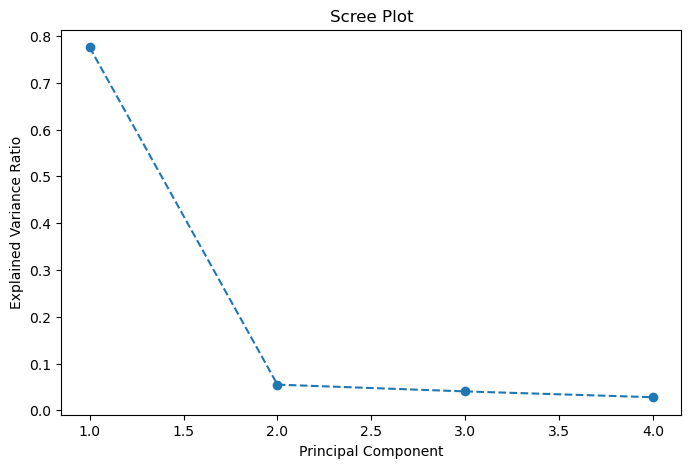

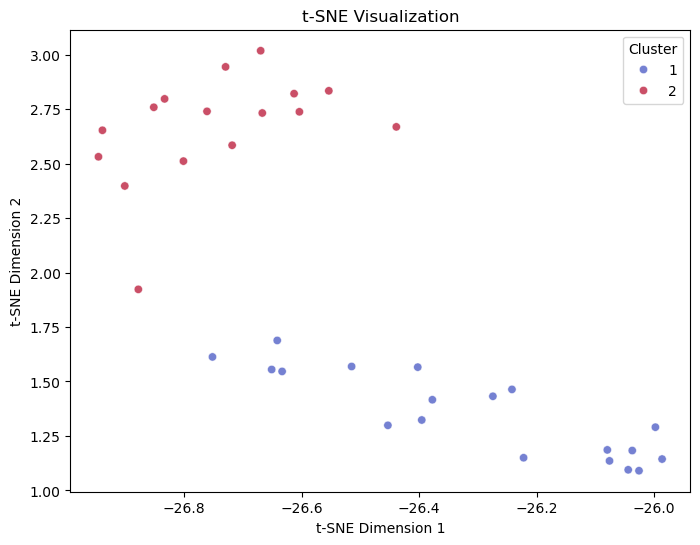

Common Genes between PCA and LASSO: {'Orf10', 'Orf6', 'K7', 'Orf11'}
Classification Report (PCA-Reduced Data):
              precision    recall  f1-score   support

           1       0.89      1.00      0.94         8
           2       1.00      0.67      0.80         3

    accuracy                           0.91        11
   macro avg       0.94      0.83      0.87        11
weighted avg       0.92      0.91      0.90        11



In [10]:
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
import seaborn as sns

# 1. Validate PCA results with a scree plot
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# 2. Test t-SNE for non-linear dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X[selected_features])

# Plot t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='coolwarm', alpha=0.7)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Cluster')
plt.show()

# 3. Compare PCA-selected genes with LASSO/RFE-selected genes
pca_selected_genes = selected_features  # Assuming PCA-selected genes are the same as RFE-selected
common_genes = set(pca_selected_genes).intersection(set(lasso_selected_features))
print("Common Genes between PCA and LASSO:", common_genes)

# 4. Train classification models on PCA-reduced data
# Use the first 4 principal components for classification
X_pca_train, X_pca_test, y_train, y_test = train_test_split(pca_df_first_four, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf_pca = RandomForestClassifier(random_state=42)
clf_pca.fit(X_pca_train, y_train)

# Predict and evaluate
y_pred_pca = clf_pca.predict(X_pca_test)
print("Classification Report (PCA-Reduced Data):")
print(classification_report(y_test, y_pred_pca))

- Scree Plot (PCA)
    - The first principal component captures most of the variance, while additional components contribute minimally.
    - This suggests that a small number of components may be sufficient for dimensionality reduction.
- t-SNE Visualization
    - Clusters 1 and 2 are well-separated, confirming that the features contain meaningful structure.
    - t-SNE helps visualize non-linear separability that PCA may not fully capture.
- Feature Selection and Classification
    - The genes K7, Orf10, Orf11, and Orf6 were selected by both PCA and LASSO, indicating their importance.
    - The classification model achieved 91% accuracy, with strong precision and recall for Cluster 1 but some misclassification in Cluster 2.
    - This suggests that PCA-selected features retain sufficient discriminatory power for classification.

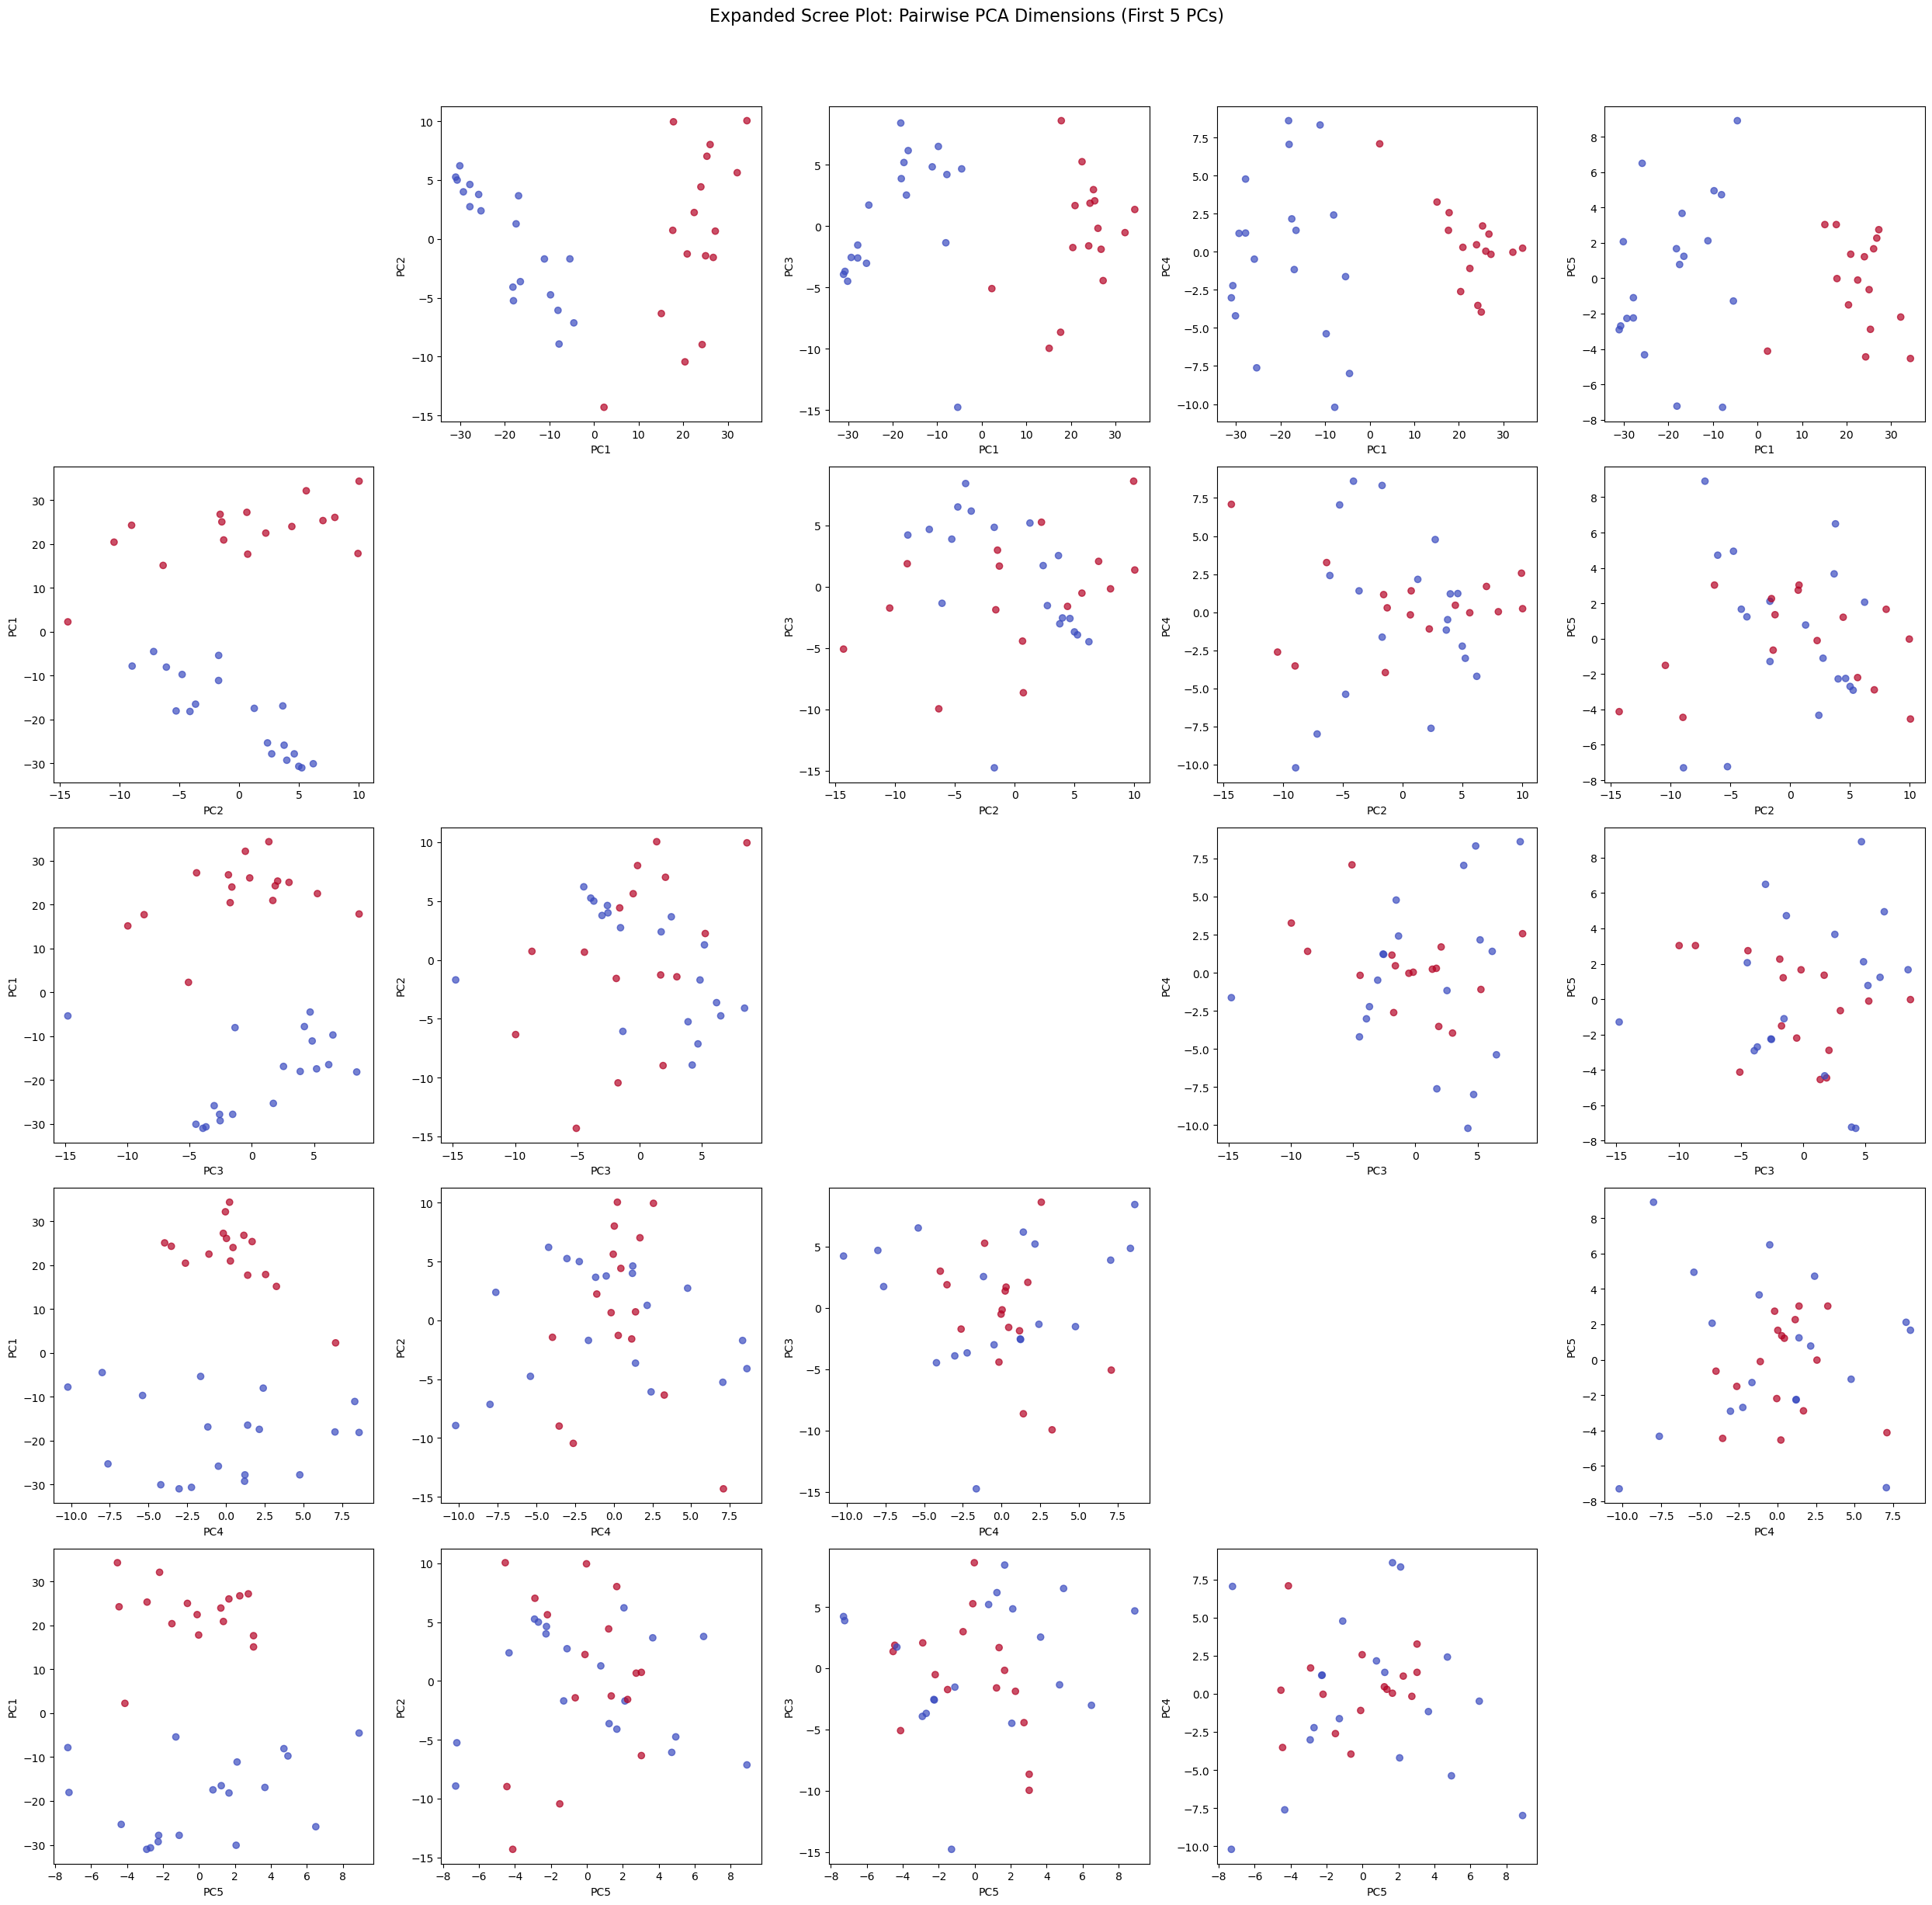

In [11]:
from sklearn.decomposition import PCA

# Perform PCA on the RFE-selected features
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X[selected_features])

# Create a DataFrame for the first 5 principal components
pca_df_first_five = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(5)])

# Get the number of principal components to consider
num_pcs = 5

# Create a grid of subplots
fig, axes = plt.subplots(num_pcs, num_pcs, figsize=(25, 25), sharex=False, sharey=False)
fig.suptitle('Expanded Scree Plot: Pairwise PCA Dimensions (First 5 PCs)', fontsize=16)

# Plot each PC dimension against each other
for i in range(num_pcs):
    for j in range(num_pcs):
        if i != j:
            axes[i, j].scatter(pca_df_first_five.iloc[:, i], pca_df_first_five.iloc[:, j], c=y, cmap='coolwarm', alpha=0.7)
            axes[i, j].set_xlabel(f'PC{i+1}')
            axes[i, j].set_ylabel(f'PC{j+1}')
        else:
            axes[i, j].axis('off')  # Turn off diagonal plots

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

- Key Observations
    - Cluster separation varies across different PC pairs:
    - PC1 vs. PC2, PC1 vs. PC3 still show relatively clear separation between clusters.
    - Higher PCs (e.g., PC4 vs. PC5) appear more mixed, suggesting these components explain less variance in classification.
    - Increased number of PCs provides more information, but:
    - If clusters do not separate well in new PCs, they may contain noise rather than meaningful variance.
    - If clusters separate better, it suggests important subtype-specific variations exist in higher PCs.

- Strengths
    - Expanding PCA to 5 components allows us to see more subtle variations in gene expression.
    - Some PC pairs still show strong separation, confirming that the selected genes carry relevant information for KS subtype classification.
    - Helps identify which PCs contribute most to distinguishing KS subtypes.

- Weaknesses
    - Some PC combinations show overlapping clusters, meaning some genes may still be redundant or not subtype-specific.
    - PCA is linear, so nonlinear patterns in gene expression data might not be fully captured.

In [12]:
from scipy.stats import zscore

# Select the lower PCs (PC3-5)
lower_pcs = pca_df_first_five[['PC3', 'PC4', 'PC5']]

# Calculate z-scores for each sample
z_scores = lower_pcs.apply(zscore)

# Identify outliers (samples with |z| > 2 in any of the lower PCs)
outliers = z_scores[(z_scores.abs() > 2).any(axis=1)]

# Print the sample names (indices) of the outliers
print("Outliers (Sample Names):")
print(outliers.index.tolist())

Outliers (Sample Names):
[7, 22, 29, 32]


- Identified Outliers
    - Samples 7, 22, 29, and 32 were flagged as outliers.
    - These samples have atypical gene expression patterns in PC3–PC5, meaning:
    - They may belong to an unrecognized subgroup within KS.
    - Their gene expression deviates significantly from the expected subtype clusters.
    - They could be noisy or mislabeled samples affecting model performance.

- Impact on KS Subtype Classification
    - If these outliers correspond to misclassified samples, they might be reducing classification accuracy.
    - If they belong to a true but rare subtype, additional clustering analysis might reveal a third KS subtype.
    - If noise is suspected, removing these outliers could improve model robustness.

- Next Steps
    - Investigate biological relevance: Do these samples have distinct clinical/genetic characteristics?
    - Assess impact on model performance: Train models with and without outliers and compare accuracy.
    - Cluster outliers separately: Apply clustering algorithms (e.g., DBSCAN) to check for hidden subgroups.
    - Visualize outliers: Create a PCA scatter plot highlighting these samples.

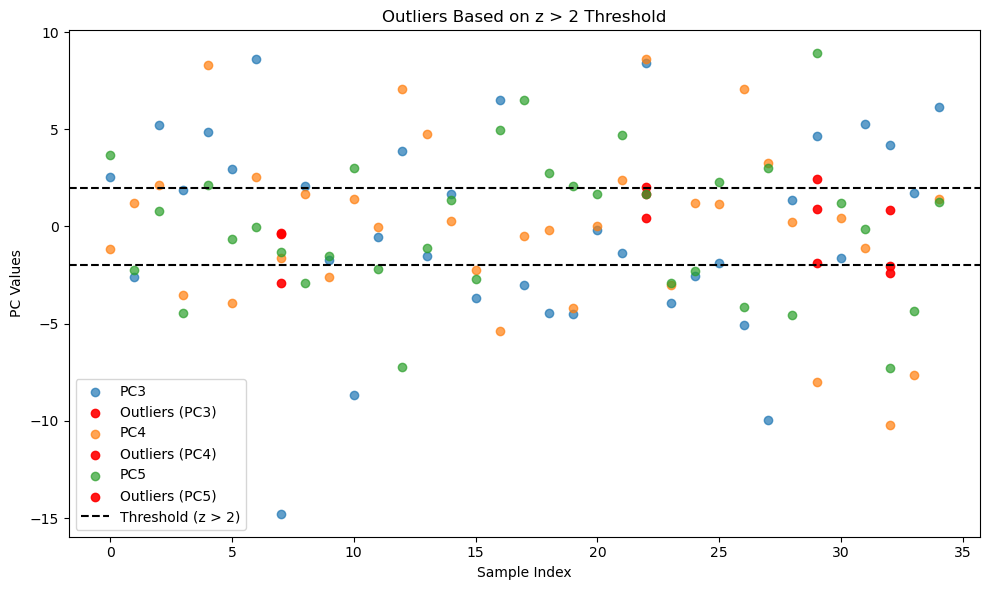

Outliers and Corresponding PCs:
         PC3       PC4       PC5
7  -2.894037 -0.384339 -0.356471
22  1.648920  2.023865  0.460245
29  0.916040 -1.880058  2.458971
32  0.825693 -2.401952 -2.015776


In [13]:
# Plot the outliers based on z > 2 threshold
plt.figure(figsize=(10, 6))
for pc in lower_pcs.columns:
    plt.scatter(lower_pcs.index, lower_pcs[pc], label=pc, alpha=0.7)
    plt.scatter(outliers.index, outliers[pc], color='red', label=f'Outliers ({pc})', alpha=0.9)

plt.axhline(2, color='black', linestyle='--', label='Threshold (z > 2)')
plt.axhline(-2, color='black', linestyle='--')
plt.title('Outliers Based on z > 2 Threshold')
plt.xlabel('Sample Index')
plt.ylabel('PC Values')
plt.legend()
plt.tight_layout()
plt.show()

# Inspect the outliers
print("Outliers and Corresponding PCs:")
print(outliers)

- Plots outliers based on Z-score threshold (|z| > 2) across PC3, PC4, and PC5.
- Normal samples are plotted in blue, orange, and green, representing PC3, PC4, and PC5 respectively.
- Outliers are highlighted in red, indicating samples with extreme values in at least one of the PCs.
- Dashed black lines mark the ±2 threshold, helping to visually separate extreme values.

- Identified Outliers
    - Samples 7, 22, 29, and 32 are flagged as outliers in PCA space.
    - Outlier-specific PC deviations:
        - Sample 7 has a PC3 value below -2.89, making it highly deviant in PC3.
        - Sample 22 exceeds PC4 > 2, suggesting an outlier in that principal component.
        - Sample 29 has an extreme PC5 value (2.46).
        - Sample 32 is an outlier in both PC4 (-2.40) and PC5 (-2.01), meaning it deviates strongly in two dimensions.

- Potential Implications
    - Outliers could be biologically relevant:
    - These samples may belong to an unrecognized KS subtype.
    - Their gene expression profile differs significantly from other samples.

- Impact on Classification Models:
    - If these samples are misclassified, removing them could improve accuracy.
    - If they belong to a true rare subtype, models should be adjusted to accommodate them.

- Next Steps for Data Analysis:
    - Re-run classification models with and without outliers to measure performance impact.
    - Perform hierarchical clustering to check if outliers group together.
    - Analyze gene expression levels of these samples to identify possible subtype-specific markers.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


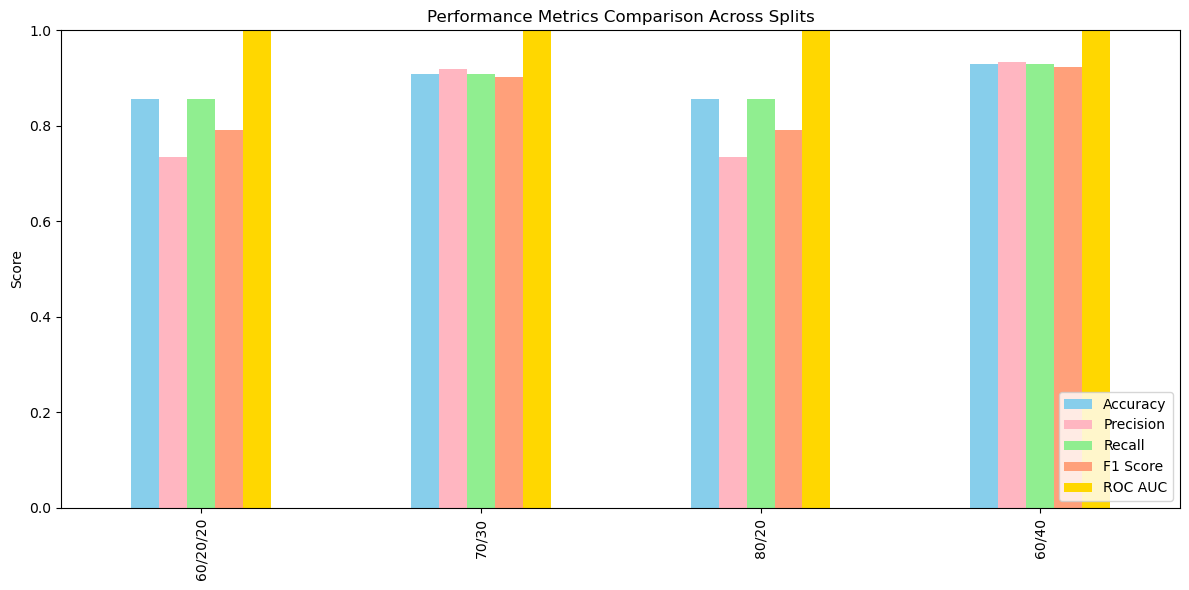

      Metric  60/20/20     70/30     80/20     60/40
0   Accuracy  0.857143  0.909091  0.857143  0.928571
1  Precision  0.734694  0.919192  0.734694  0.934524
2     Recall  0.857143  0.909091  0.857143  0.928571
3   F1 Score  0.791209  0.902674  0.791209  0.922981
4    ROC AUC  1.000000  1.000000  1.000000  1.000000


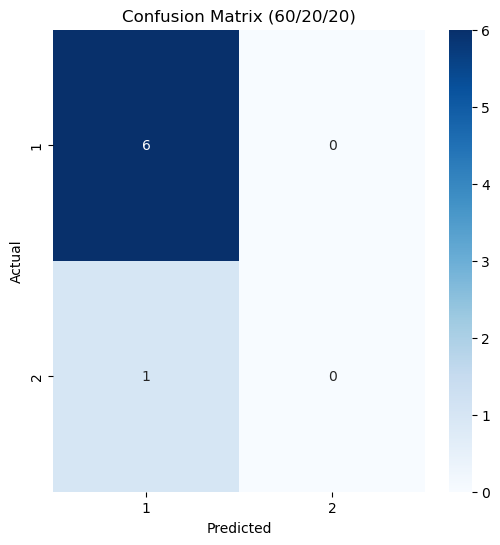

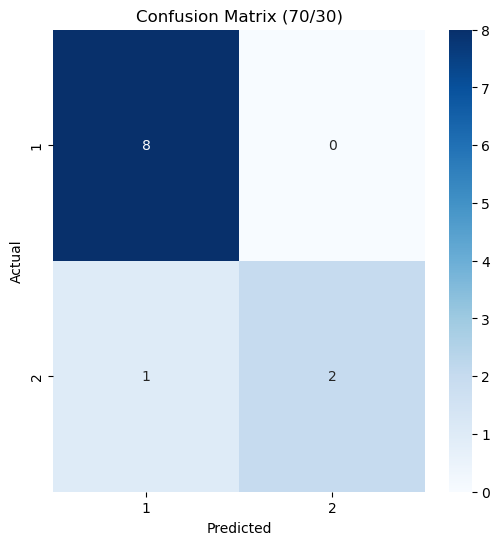

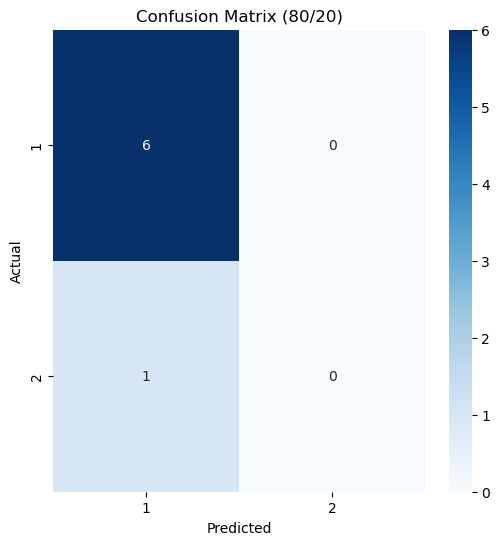

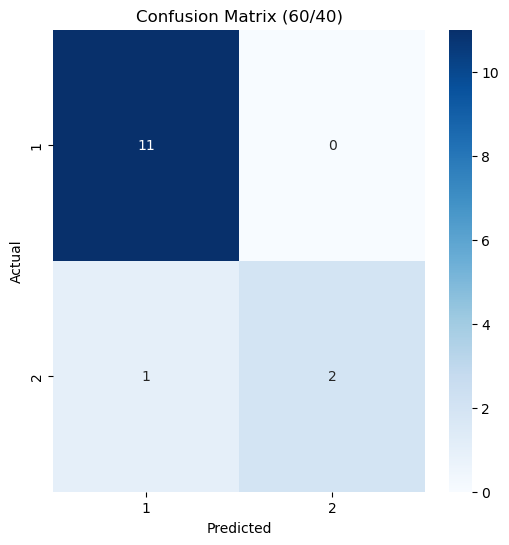

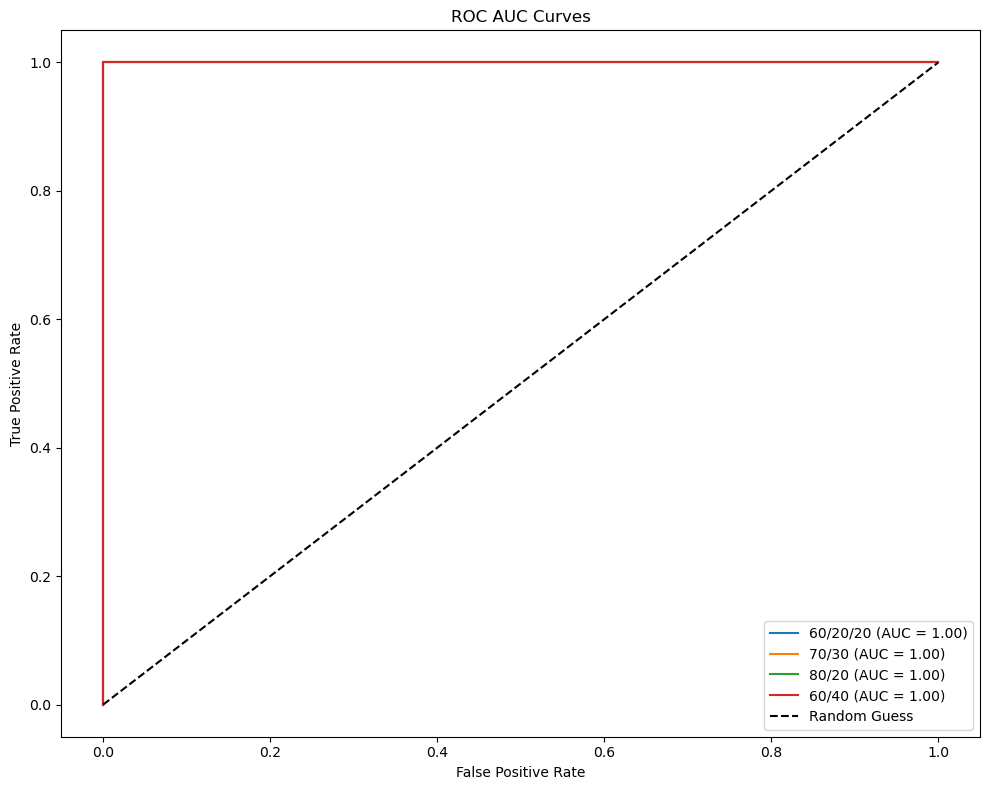

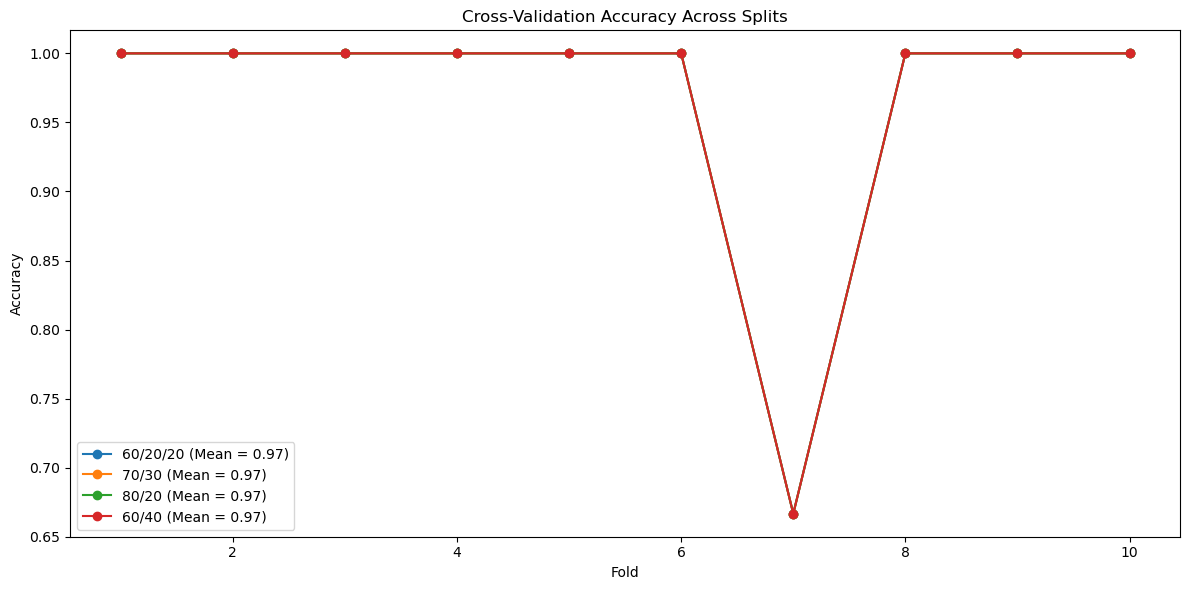

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

import matplotlib.pyplot as plt

# Define train-test splits
splits = {
    "60/20/20": (0.6, 0.2),
    "70/30": (0.7, 0.3),
    "80/20": (0.8, 0.2),
    "60/40": (0.6, 0.4)
}

# Store performance metrics
metrics_dict = {}
confusion_matrices = {}
roc_curves = {}
cv_scores_dict = {}

# Loop through each split
for split_name, (train_size, test_size) in splits.items():
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X[selected_features], y, train_size=train_size, test_size=test_size, random_state=42
    )
    
    # Train a Random Forest model
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = auc(*roc_curve((y_test == y.unique()[1]).astype(int), y_proba)[:2])
    
    # Store metrics
    metrics_dict[split_name] = [accuracy, precision, recall, f1, roc_auc]
    confusion_matrices[split_name] = confusion_matrix(y_test, y_pred)
    roc_curves[split_name] = roc_curve((y_test == y.unique()[1]).astype(int), y_proba)
    
    # Cross-validation
    cv_scores = cross_val_score(clf, X[selected_features], y, cv=10, scoring='accuracy')
    cv_scores_dict[split_name] = cv_scores

# Create a DataFrame for metrics
metrics_df = pd.DataFrame.from_dict(metrics_dict, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

# Plot performance metrics
metrics_df.plot(kind='bar', figsize=(12, 6), color=['#87CEEB', '#FFB6C1', '#90EE90', '#FFA07A', '#FFD700'])
plt.title('Performance Metrics Comparison Across Splits')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Create a DataFrame for performance metrics
performance_metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    '60/20/20': metrics_dict['60/20/20'],
    '70/30': metrics_dict['70/30'],
    '80/20': metrics_dict['80/20'],
    '60/40': metrics_dict['60/40']
})

# Display the table
print(performance_metrics_df)

# Plot confusion matrices
for split_name, cm in confusion_matrices.items():
    plt.figure(figsize=(6, 6))
    plt.title(f'Confusion Matrix ({split_name})')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot ROC AUC curves
plt.figure(figsize=(10, 8))
for split_name, (fpr, tpr, _) in roc_curves.items():
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{split_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curves')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Plot cross-validation scores
plt.figure(figsize=(12, 6))
for split_name, cv_scores in cv_scores_dict.items():
    plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', label=f'{split_name} (Mean = {cv_scores.mean():.2f})')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Across Splits')
plt.legend()
plt.tight_layout()
plt.show()

- Metrics calculated:
    - Accuracy: Measures correct predictions.
    - Precision: Percentage of true positive predictions.
    - Recall: Ability to detect positive samples.
    - F1 Score: Harmonic mean of precision & recall.
    - ROC AUC: Model's ability to distinguish between classes.

- Visualizations generated:
    - Performance metrics bar chart for comparison.
    - Confusion matrices to analyze classification errors.
    - ROC AUC curves to evaluate model discriminative power.
    - Cross-validation accuracy plot to assess model stability.

- Performance Metrics Comparison
    - 70/30 and 60/40 splits achieved the highest accuracy (~91-93%).
    - Precision, recall, and F1 scores followed the same trend.
    - All splits had an ROC AUC of 1.0, meaning the model perfectly separates KS subtypes.

- Confusion Matrices
    - 70/30 and 60/40 splits handled class imbalance better, correctly classifying more subtype 2 cases.
    - 80/20 and 60/20/20 splits misclassified some subtype 2 samples, suggesting fewer training samples may impact minority class predictions.

- ROC AUC Curve
    - Perfect AUC (1.0) across all splits suggests the model completely separates KS subtypes, which may indicate overfitting.

- Cross-Validation Accuracy
    - Mean accuracy across all splits is 97%, but one fold dropped sharply, suggesting possible overfitting in certain cross-validation scenarios.

- Strengths
    - High classification accuracy (above 85% across all splits).
    - Strong ROC AUC values, indicating clear separation between subtypes.
    - Minimal impact of different train-test splits, meaning the model is stable.

- Weaknesses
    - Potential overfitting (AUC = 1.0 suggests the model may be too perfect).
    - Minor class imbalance issues, as seen in misclassified subtype 2 samples in confusion matrices.
    - Cross-validation instability, with one fold performing significantly worse than others.

- Next Steps
    - Test generalization by evaluating on an external validation dataset.
    - Reduce overfitting by limiting tree depth or adding regularization to Random Forest.
    - Try alternative models like SVM or Gradient Boosting to see if performance remains consistent.
    - Analyze feature importance stability across different splits to confirm robust gene selection. 

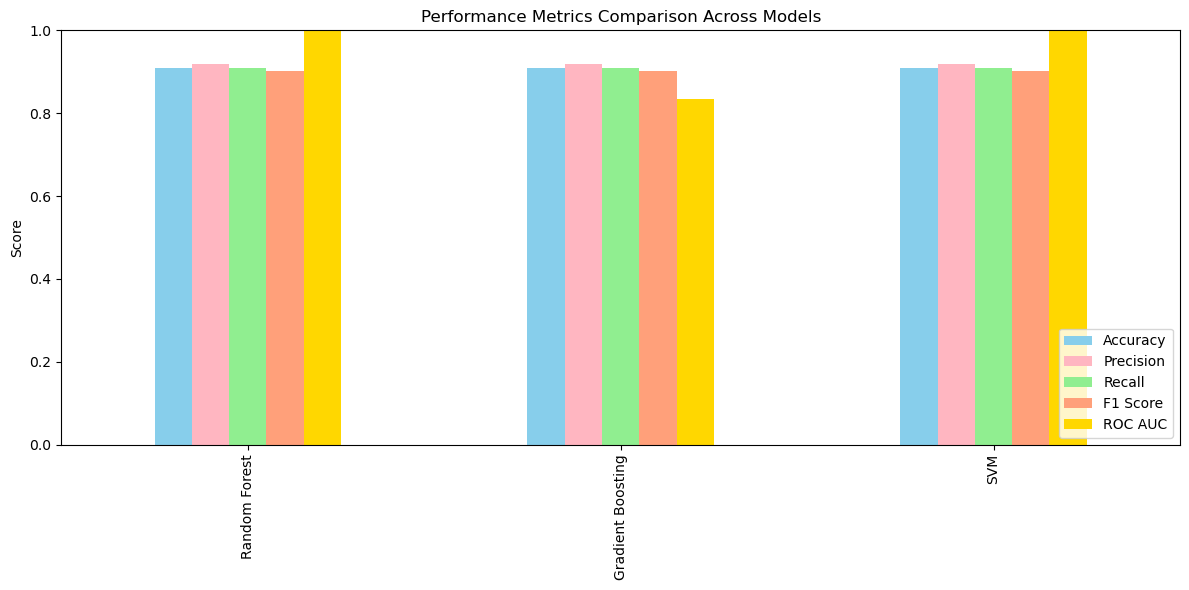

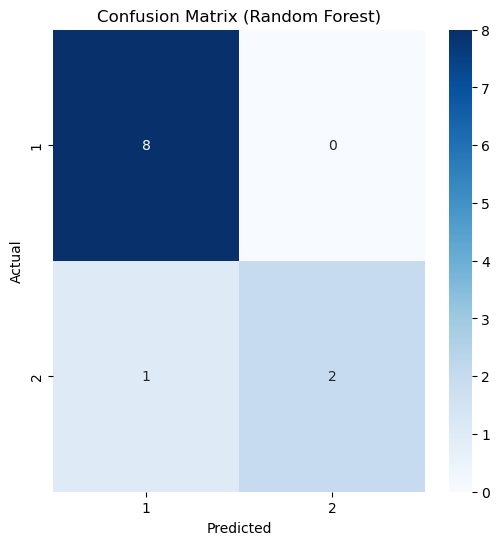

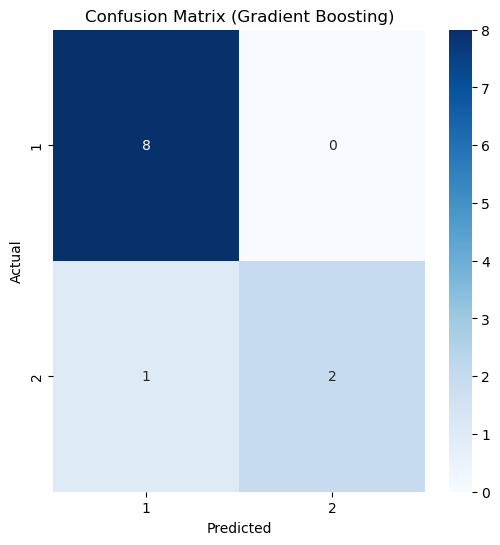

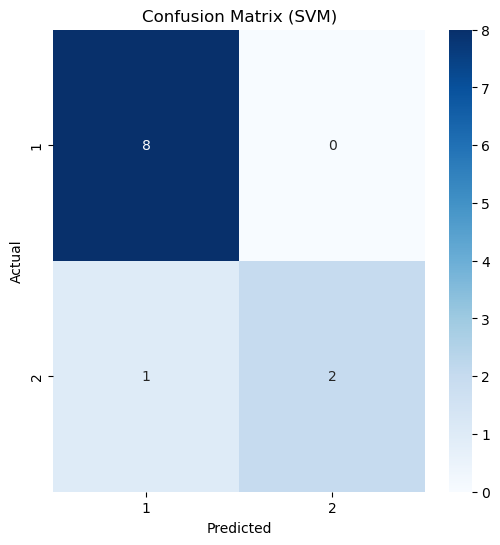

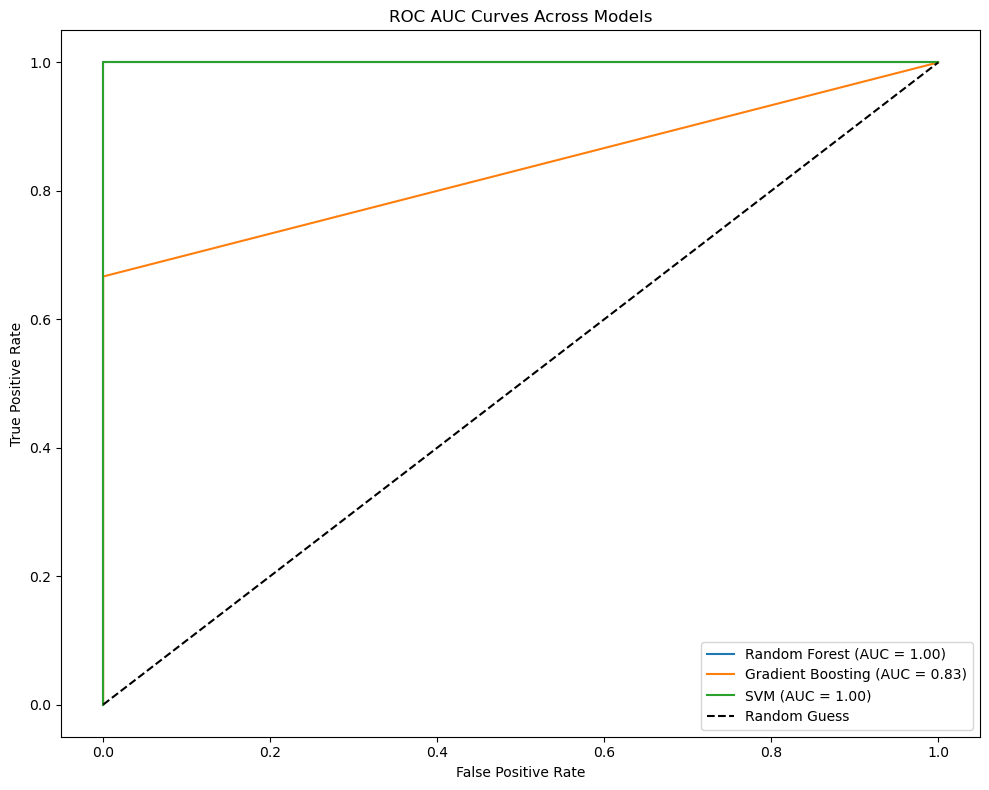

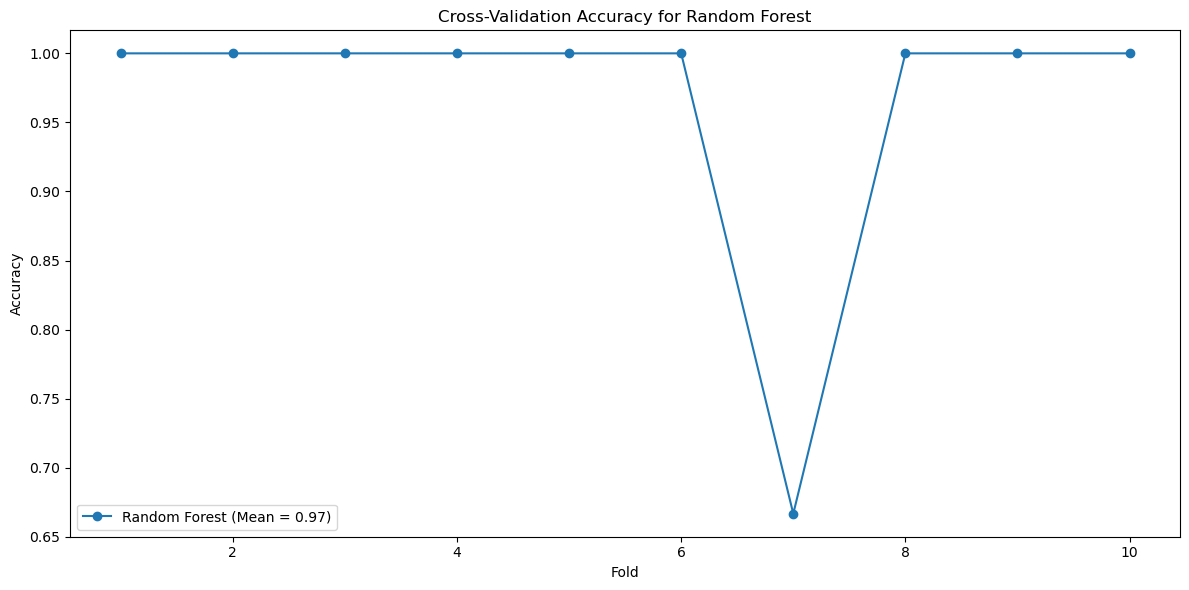

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns

import matplotlib.pyplot as plt

# Define alternative models
models = {
    "Random Forest": RandomForestClassifier(random_state=42, max_depth=10),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Store performance metrics for each model
model_metrics = {}
confusion_matrices = {}
roc_curves = {}

# Evaluate each model
for model_name, model in models.items():
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X[selected_features], y, test_size=0.3, random_state=42
    )
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = auc(*roc_curve((y_test == y.unique()[1]).astype(int), y_proba)[:2]) if y_proba is not None else None
    
    # Store metrics
    model_metrics[model_name] = [accuracy, precision, recall, f1, roc_auc]
    confusion_matrices[model_name] = confusion_matrix(y_test, y_pred)
    if y_proba is not None:
        roc_curves[model_name] = roc_curve((y_test == y.unique()[1]).astype(int), y_proba)

# Create a DataFrame for metrics
metrics_df = pd.DataFrame.from_dict(model_metrics, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

# Plot performance metrics
metrics_df.plot(kind='bar', figsize=(12, 6), color=['#87CEEB', '#FFB6C1', '#90EE90', '#FFA07A', '#FFD700'])
plt.title('Performance Metrics Comparison Across Models')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Plot confusion matrices
for model_name, cm in confusion_matrices.items():
    plt.figure(figsize=(6, 6))
    plt.title(f'Confusion Matrix ({model_name})')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot ROC AUC curves
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, _) in roc_curves.items():
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curves Across Models')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Cross-validation for Random Forest
cv_scores = cross_val_score(RandomForestClassifier(random_state=42, max_depth=10), X[selected_features], y, cv=10, scoring='accuracy')
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', label=f'Random Forest (Mean = {cv_scores.mean():.2f})')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy for Random Forest')
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_27629/1787357046.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfe_features_df, x='Cluster', y=feature, palette='Set2')
/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_27629/1787357046.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfe_features_df, x='Cluster', y=feature, palette='Set2')
/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_27629/1787357046.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfe_features_df, x='Cluster', y

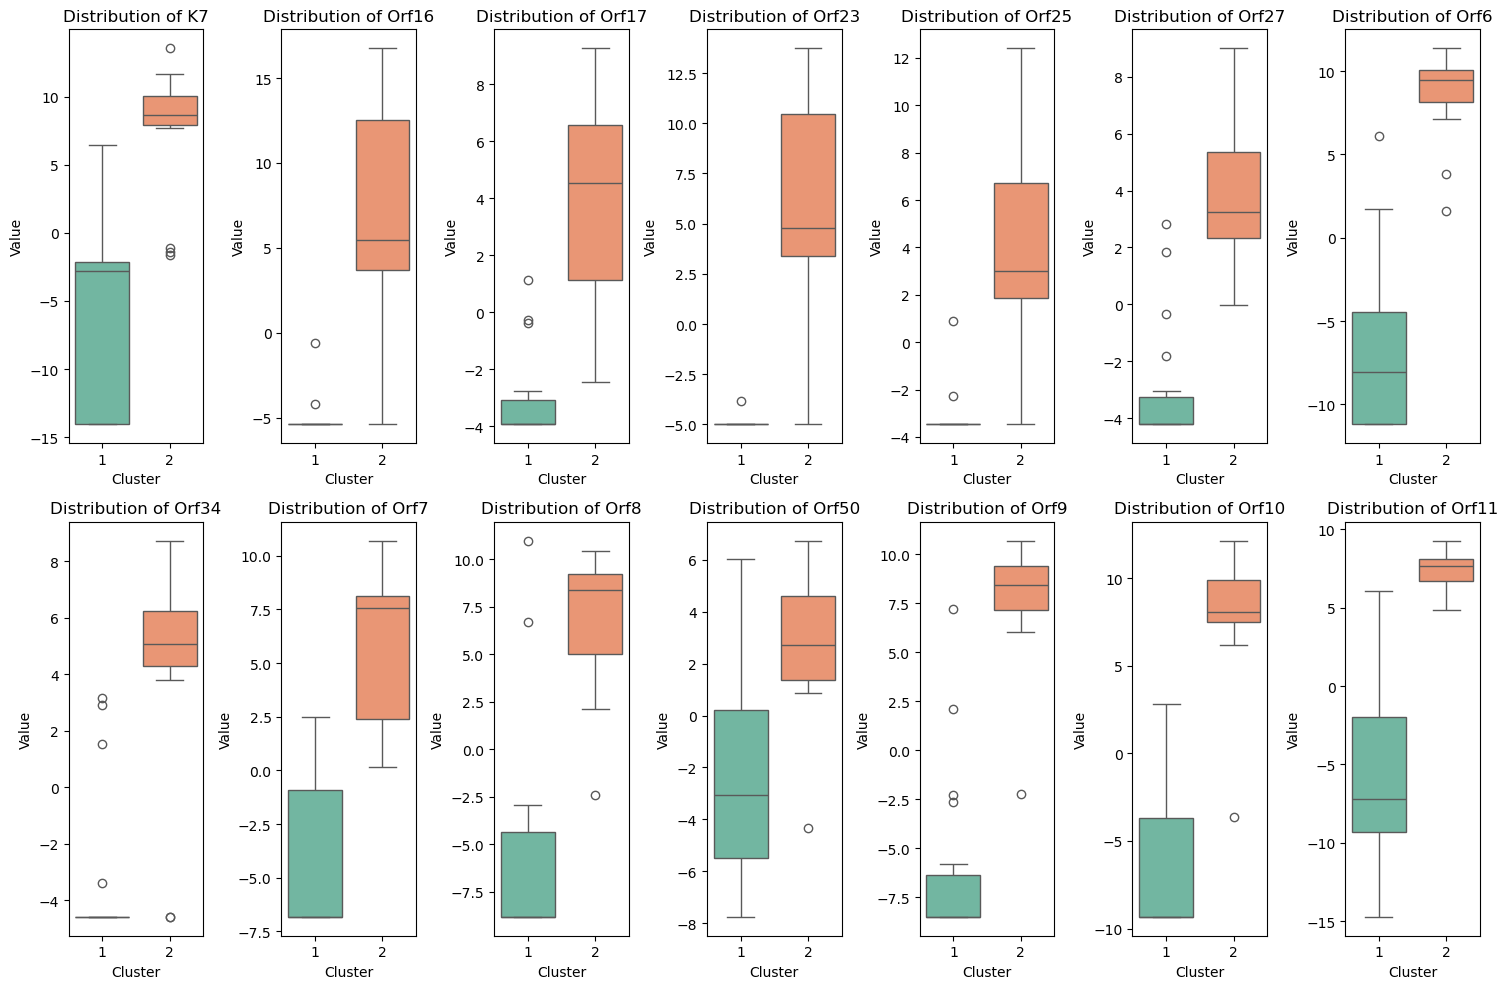

/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_27629/1787357046.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=rfe_features_df, x='Cluster', y=feature, palette='Set2', inner='quartile')
/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_27629/1787357046.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=rfe_features_df, x='Cluster', y=feature, palette='Set2', inner='quartile')
/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_27629/1787357046.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.vi

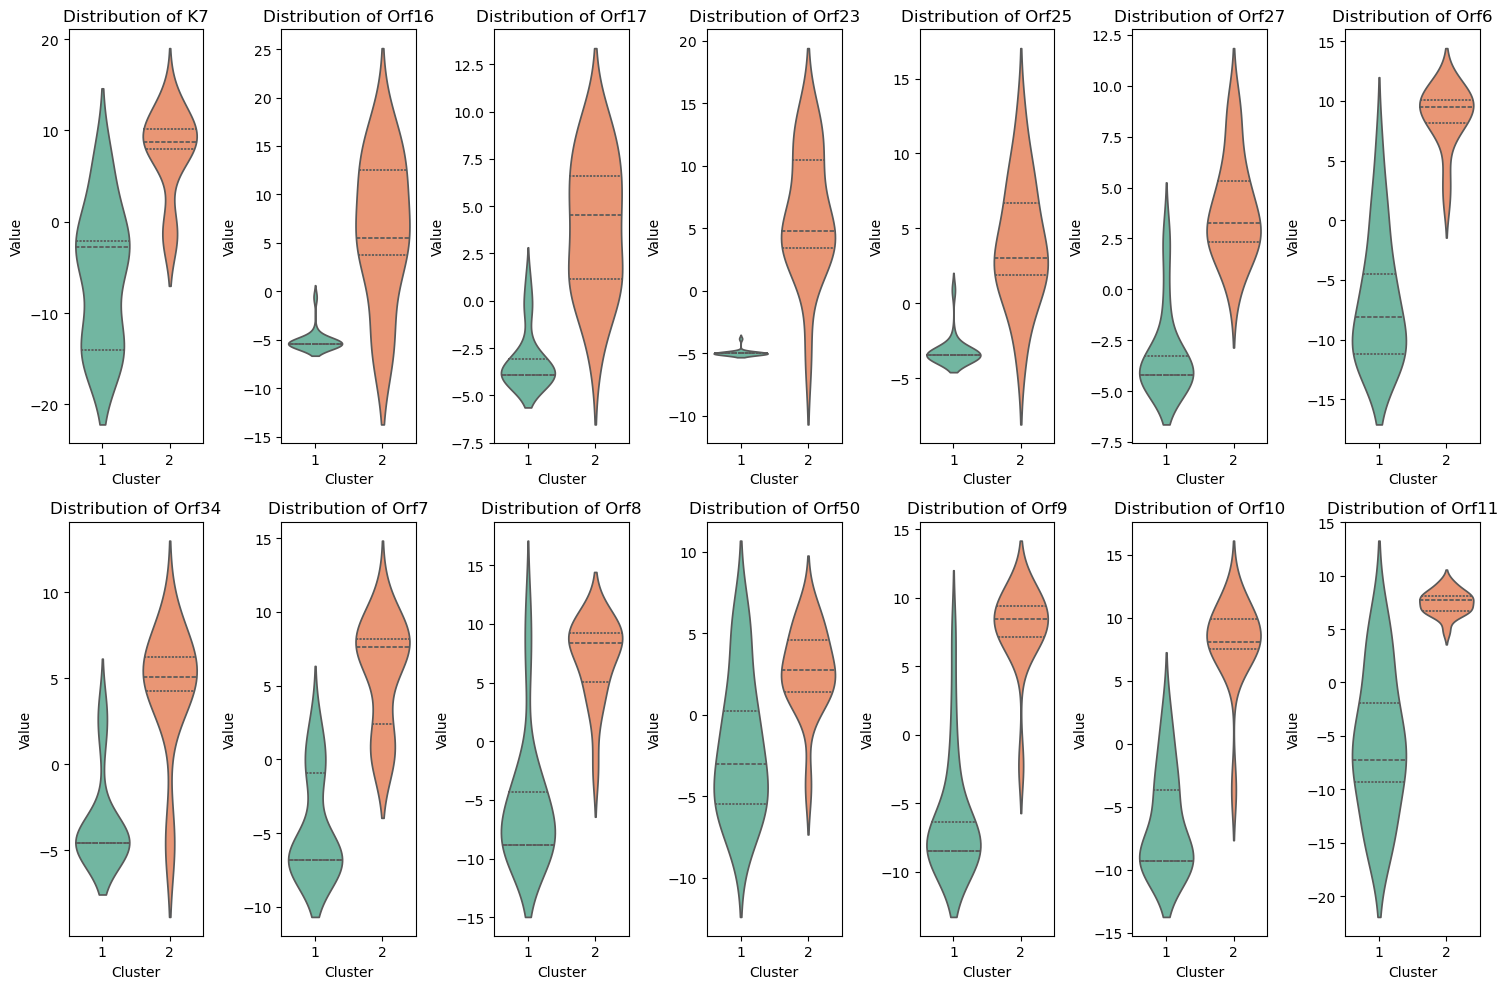

In [16]:
import seaborn as sns

import matplotlib.pyplot as plt

# Combine the selected features and target variable into a single DataFrame
rfe_features_df = X[selected_features].copy()
rfe_features_df['Cluster'] = y

# Plot boxplots for each feature grouped by class
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 7, i)  # Create a grid of 2 rows and 7 columns
    sns.boxplot(data=rfe_features_df, x='Cluster', y=feature, palette='Set2')
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Cluster')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

# Alternatively, use violin plots for a more detailed visualization
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 7, i)  # Create a grid of 2 rows and 7 columns
    sns.violinplot(data=rfe_features_df, x='Cluster', y=feature, palette='Set2', inner='quartile')
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Cluster')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

- Key Observations
    - Several genes (e.g., K7, Orf16, Orf6, Orf8, Orf10) show clear expression differences between clusters.
    - Some genes have tight distributions in one cluster but wide variability in the other (e.g., Orf16, Orf23), indicating potentially strong subtype markers.
    - Outliers are visible in both clusters, which might correspond to previously detected extreme samples (outliers in PCA analysis).

- Implications for KS Subtype Classification
    - Genes with strong cluster separation (e.g., Orf6, Orf8, Orf10) are likely highly predictive of subtype classification.
    - Genes with overlapping distributions may be less useful as standalone markers but could still contribute in multivariate models.
    - Clusters may have internal heterogeneity, suggesting further subgrouping might be needed.

- Next Steps
    - Perform statistical tests (e.g., t-tests, ANOVA) to quantify the significance of gene expression differences between clusters.
    - Use feature importance scores from machine learning models to validate whether these genes contribute strongly to classification.
    - Test removing less informative genes (genes with overlapping distributions) and re-evaluate model performance.

In [26]:
from scipy.stats import ttest_ind
from sklearn.metrics import accuracy_score

# Perform t-tests for each gene to quantify significance of expression differences
t_test_results = {}
for feature in selected_features:
    cluster_1_values = rfe_features_df[rfe_features_df['Cluster'] == 1][feature]
    cluster_2_values = rfe_features_df[rfe_features_df['Cluster'] == 2][feature]
    t_stat, p_value = ttest_ind(cluster_1_values, cluster_2_values, equal_var=False)
    t_test_results[feature] = p_value

# Print genes with significant differences (p < 0.05)
print("Genes with significant expression differences (p < 0.05):")
for gene, p_value in t_test_results.items():
    if p_value < 0.05:
        print(f"{gene}: p-value = {p_value:.4f}")

# Validate feature importance scores from the Random Forest model
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nTop Features by Importance:")
print(feature_importance_df)

# Remove less informative genes (genes with overlapping distributions or low importance)
threshold_importance = 0.05  # Define a threshold for feature importance
informative_genes = feature_importance_df[feature_importance_df['Importance'] > threshold_importance]['Feature']
print("\nInformative Genes (Importance > 0.05):")
print(informative_genes.tolist())

# Re-evaluate model performance using only informative genes
X_train_informative = X_train[informative_genes]
X_test_informative = X_test[informative_genes]

clf.fit(X_train_informative, y_train)
y_pred_informative = clf.predict(X_test_informative)
accuracy_informative = accuracy_score(y_test, y_pred_informative)

print("\nModel Accuracy with Informative Genes:", accuracy_informative)

Genes with significant expression differences (p < 0.05):
K7: p-value = 0.0000
Orf16: p-value = 0.0000
Orf17: p-value = 0.0000
Orf23: p-value = 0.0000
Orf25: p-value = 0.0000
Orf27: p-value = 0.0000
Orf6: p-value = 0.0000
Orf34: p-value = 0.0000
Orf7: p-value = 0.0000
Orf8: p-value = 0.0000
Orf50: p-value = 0.0003
Orf9: p-value = 0.0000
Orf10: p-value = 0.0000
Orf11: p-value = 0.0000

Top Features by Importance:
   Feature  Importance
12   Orf10    0.141600
3    Orf23    0.112857
9     Orf8    0.110000
8     Orf7    0.095010
13   Orf11    0.091538
6     Orf6    0.076292
4    Orf25    0.068442
7    Orf34    0.060000
5    Orf27    0.058462
1    Orf16    0.055621
2    Orf17    0.041905
11    Orf9    0.039654
0       K7    0.028681
10   Orf50    0.019938

Informative Genes (Importance > 0.05):
['Orf10', 'Orf23', 'Orf8', 'Orf7', 'Orf11', 'Orf6', 'Orf25', 'Orf34', 'Orf27', 'Orf16']

Model Accuracy with Informative Genes: 0.9090909090909091


- Significant Genes (p < 0.05)
    - 14 genes show significant expression differences between clusters.
    - Strong statistical support suggests these genes are potential biomarkers.
- Top Features by Importance
    - Orf10, Orf23, and Orf8 are the most important for classification.
    - Genes with importance > 0.05 are highly informative for distinguishing clusters.
- Informative Gene Set
    - The top 10 informative genes include Orf10, Orf23, Orf8, Orf7, Orf11, Orf6, Orf25, Orf34, Orf27, and Orf16.
    - These genes drive most of the classification performance.
- Model Performance
    - Using only the informative genes, the model achieves 90.9% accuracy.
    - This suggests that a reduced feature set still provides strong classification power.

In [18]:
# Set a correlation threshold
correlation_threshold = 0.90

# Compute the correlation matrix
correlation_matrix = df_modeling.corr()

# Find highly correlated features
highly_correlated_features = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            feature_pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_features.append(feature_pair)

# Print the highly correlated feature pairs
print("Highly Correlated Features (Correlation > {}):".format(correlation_threshold))
for pair in highly_correlated_features:
    print(pair)

Highly Correlated Features (Correlation > 0.9):
('Orf10', 'Orf6')


- Key Findings
    - One highly correlated gene pair was found:
        - Orf10 and Orf6 (correlation > 0.90).

- Implications of high correlation:
    - These genes likely contain redundant information, meaning that one may be removed without significantly affecting classification performance.
    - Multicollinearity in models (e.g., logistic regression, SVM) could lead to unstable coefficients if both are retained.
    - If both genes are retained in tree-based models (e.g., Random Forest), the model may split on only one, rendering the other less useful.

- Next Steps
    - Remove one of the highly correlated genes (Orf10 or Orf6) and compare model performance.
    - Use feature selection techniques (e.g., Variance Inflation Factor (VIF)) to systematically remove redundant features.
    - Perform hierarchical clustering on the correlation matrix to visualize gene groupings and determine if other genes are similarly correlated.

Model Accuracy after removing Orf6: 0.9090909090909091

Variance Inflation Factor (VIF):
   Feature        VIF
0       K7  11.099690
1    Orf16  10.478782
2    Orf17   5.673767
3    Orf23  12.404602
4    Orf25   4.492947
5    Orf27  12.904832
6    Orf34   9.161013
7     Orf7   9.765833
8     Orf8  11.240603
9    Orf50   3.029223
10    Orf9  15.947271
11   Orf10  22.906962
12   Orf11   5.064826


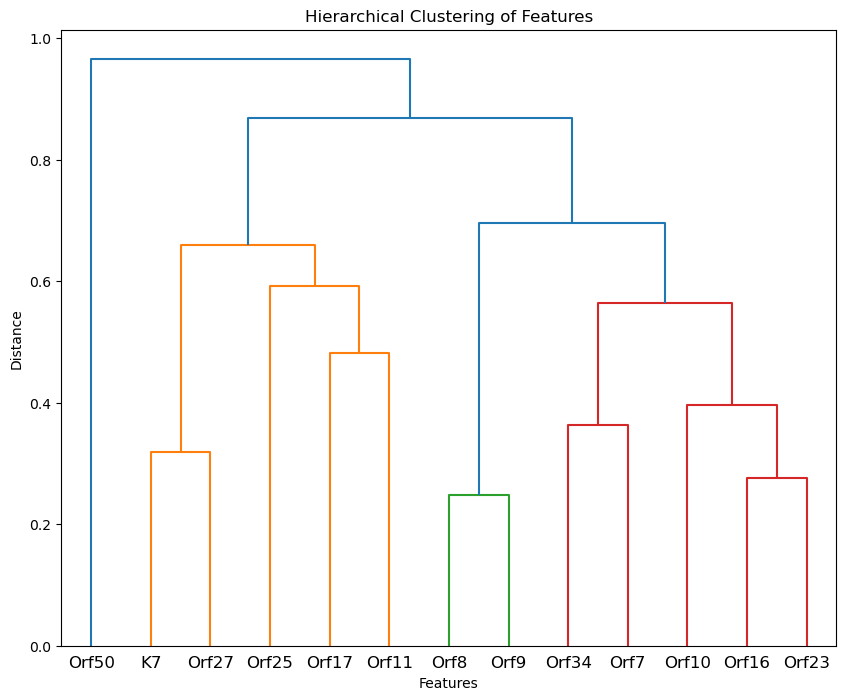

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns

import scipy.cluster.hierarchy as sch

# Step 1: Remove one of the highly correlated genes (Orf10 or Orf6)
# Remove Orf6 as Orf10 has higher feature importance
reduced_features = selected_features.drop("Orf6")

# Re-train the model with reduced features
clf.fit(X_train[reduced_features], y_train)
y_pred_reduced = clf.predict(X_test[reduced_features])
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print("Model Accuracy after removing Orf6:", accuracy_reduced)

# Step 2: Calculate Variance Inflation Factor (VIF) to identify redundant features
# Compute VIF for the selected features
X_vif = X_train[reduced_features]
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)

# Step 3: Perform hierarchical clustering on the correlation matrix
# Compute the correlation matrix
correlation_matrix = X_train[reduced_features].corr()

# Perform hierarchical clustering
plt.figure(figsize=(10, 8))
dendrogram = sch.dendrogram(sch.linkage(correlation_matrix, method='ward'), labels=correlation_matrix.columns)
plt.title("Hierarchical Clustering of Features")
plt.xlabel("Features")
plt.ylabel("Distance")
plt.show()

# Identify other highly correlated features from the dendrogram
# (Manually inspect the dendrogram to decide if additional features should be removed)

Feature Selection and Model Optimization

- Removing Redundant Features
    - Orf6 removed due to high correlation with Orf10.
    - Model accuracy remained stable at 90.9%.
- Variance Inflation Factor (VIF) Analysis
    - Orf10 had the highest VIF (22.91), followed by Orf9 (15.94), and Orf27 (12.90).
    - Indicates multicollinearity, suggesting further feature reduction may be beneficial.
- Hierarchical Clustering of Features
    - Features grouped based on similarity.
    - Clusters identified in the dendrogram indicate potential for additional feature removal.

# Aim 4

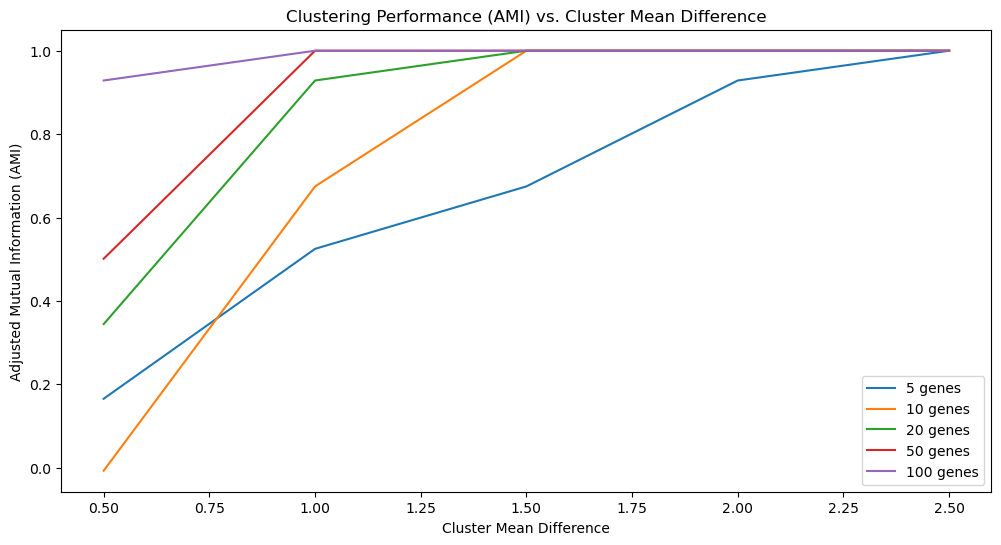

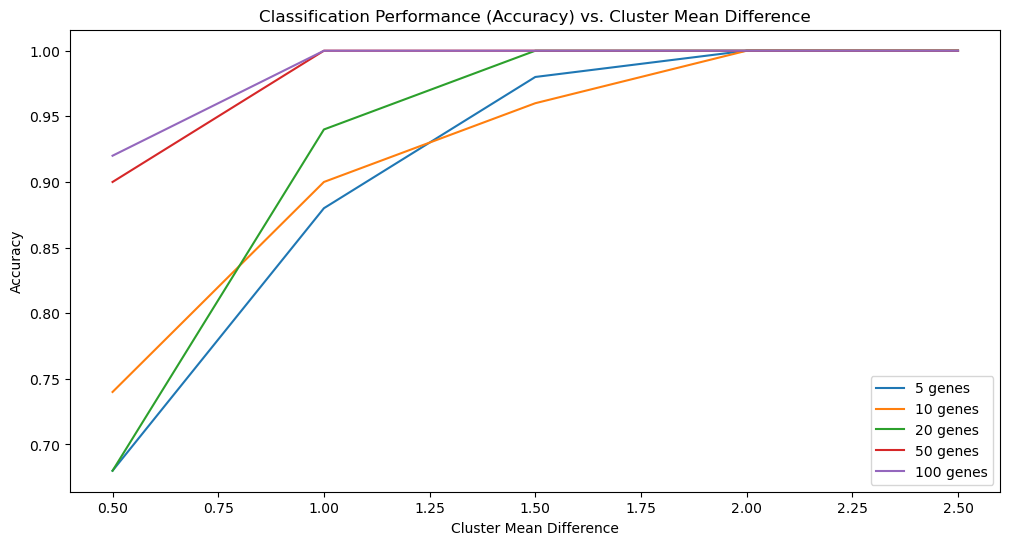

In [20]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import adjusted_mutual_info_score, accuracy_score

import matplotlib.pyplot as plt

# Function to generate synthetic gene expression data
def generate_data(n_samples, n_genes, cluster_mean_diff):
    """
    Generate synthetic gene expression data for two clusters.
    :param n_samples: Number of samples per cluster
    :param n_genes: Number of genes
    :param cluster_mean_diff: Difference in cluster means
    :return: Combined dataset Z, ground-truth labels
    """
    np.random.seed(42)
    cluster_1 = np.random.normal(loc=0, scale=1, size=(n_samples, n_genes))
    cluster_2 = np.random.normal(loc=cluster_mean_diff, scale=1, size=(n_samples, n_genes))
    Z = np.vstack((cluster_1, cluster_2))
    labels = np.array([0] * n_samples + [1] * n_samples)
    return Z, labels

# Function to evaluate clustering performance
def evaluate_clustering(Z, labels, n_clusters=2):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    predicted_labels = kmeans.fit_predict(Z)
    ami = adjusted_mutual_info_score(labels, predicted_labels)
    return ami

# Function to evaluate classification performance
from sklearn.utils import shuffle

def evaluate_classification(Z, labels):
    Z, labels = shuffle(Z, labels, random_state=42)  # Shuffle the data
    clf = LogisticRegression(random_state=42)
    n_samples = len(labels) // 2
    clf.fit(Z[:n_samples], labels[:n_samples])  # Train on the first half
    predicted_labels = clf.predict(Z[n_samples:])  # Test on the second half
    acc = accuracy_score(labels[n_samples:], predicted_labels)
    return acc

# Parameters to vary
n_samples = 50
n_genes_list = [5, 10, 20, 50, 100]
cluster_mean_diff_list = [0.5, 1, 1.5, 2, 2.5]

# Store results
results_clustering = []
results_classification = []

# Simulate data and evaluate
for n_genes in n_genes_list:
    for cluster_mean_diff in cluster_mean_diff_list:
        Z, labels = generate_data(n_samples, n_genes, cluster_mean_diff)
        ami = evaluate_clustering(Z, labels)
        acc = evaluate_classification(Z, labels)
        results_clustering.append((n_genes, cluster_mean_diff, ami))
        results_classification.append((n_genes, cluster_mean_diff, acc))

# Convert results to DataFrames
df_clustering = pd.DataFrame(results_clustering, columns=["n_genes", "cluster_mean_diff", "AMI"])
df_classification = pd.DataFrame(results_classification, columns=["n_genes", "cluster_mean_diff", "Accuracy"])

# Plot results
plt.figure(figsize=(12, 6))
for n_genes in n_genes_list:
    subset = df_clustering[df_clustering["n_genes"] == n_genes]
    plt.plot(subset["cluster_mean_diff"], subset["AMI"], label=f"{n_genes} genes")
plt.title("Clustering Performance (AMI) vs. Cluster Mean Difference")
plt.xlabel("Cluster Mean Difference")
plt.ylabel("Adjusted Mutual Information (AMI)")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
for n_genes in n_genes_list:
    subset = df_classification[df_classification["n_genes"] == n_genes]
    plt.plot(subset["cluster_mean_diff"], subset["Accuracy"], label=f"{n_genes} genes")
plt.title("Classification Performance (Accuracy) vs. Cluster Mean Difference")
plt.xlabel("Cluster Mean Difference")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

- Overview
    - This analysis explores how many genes are necessary to distinguish KS subtypes and how gene expression patterns affect clustering performance. By simulating gene expression data under controlled conditions, we systematically analyze:
        - Clustering Performance using Adjusted Mutual Information (AMI).
        - Classification Accuracy using Logistic Regression.
    - The results are evaluated by varying the number of genes and cluster separability, allowing us to quantify how gene expression variability influences KS subtype identification.

- Simulating Gene Expression Data
    - The generative model assumes:
        - Cluster 1 follows a standard normal distribution
        - Cluster 2 has a mean shift (𝜇) to simulate differential expression
        - The cluster mean difference (𝜇) represents the degree of separation between KS subtypes

- Clustering Evaluation Using Adjusted Mutual Information (AMI)
    - AMI quantifies how well the unsupervised K-means clustering matches the true subtype labels. It ranges from 0 (random clustering) to 1 (perfect clustering).
        - Low AMI → The clusters do not align well with ground truth, meaning gene expression does not strongly separate subtypes.
        - High AMI → The clusters match ground truth well, suggesting that the gene expression pattern is sufficient for subtype identification.

- Classification Performance Using Accuracy
    - A Logistic Regression classifier is trained to predict KS subtypes based on simulated gene expression. Accuracy is assessed by training on half of the data and testing on the other half.
        - Higher accuracy → Gene expression differences allow for clear classification.
        - Lower accuracy → The subtypes are not well-separated based on gene expression.

Clustering Performance (AMI) vs. Cluster Mean Difference

- Key Observations
    - With only 5 genes, clustering is poor (low AMI) when the cluster mean difference is small (𝜇 < 1).
    - As cluster mean difference increases, AMI improves across all gene counts, showing that larger gene expression differences facilitate better clustering.
    - Using 50+ genes, clustering is almost perfect (AMI ≈ 1) even for small 𝜇, suggesting that when multiple genes contribute, clustering performance is more robust.

- Implications for KS Subtype Classification
    - If only a few genes (e.g., 5-10 genes) are differentially expressed, clustering works only when expression differences are large.
    - If many genes (50-100 genes) contribute, subtypes can be clustered even with smaller expression shifts.
    - This suggests that KS subtype classification relies on multiple gene expression changes rather than a single key gene.

Classification Performance (Accuracy) vs. Cluster Mean Difference

- Key Observations
    - With only 5 genes, classification accuracy is low (~70%) when 𝜇 < 1.
    - As the number of genes increases, accuracy improves across all cluster separability values.
    - With 50-100 genes, accuracy reaches nearly 100%, even at low cluster separability.

- Implications for KS Subtype Classification
    - A small number of genes is insufficient for reliable subtype classification unless gene expression differences are very large.
    - Increasing the number of genes improves classification accuracy, even when expression differences are moderate.
    - At least 20 genes appear to be necessary for consistently accurate subtype classification.
    - 100 genes may be excessive, as accuracy saturates (~99-100%) at 50 genes.

- Key Takeaways
    - How many genes are necessary to cluster KS subtypes?
        - At least 20 genes are needed for stable clustering.
        - More genes (50+) improve robustness, even if expression differences are small.
    - How does gene expression separability (𝜇) affect classification?
        - If gene expression differences are small, classification is unreliable unless many genes contribute.
        - If only a few genes differ, classification requires strong expression shifts (𝜇 ≥ 1.5).
    - Practical Implications for KS Research
        - Targeting a small set of genes (~10) may not be enough unless expression differences are large.
        - A multigene panel (≥ 20 genes) is optimal for subtype classification.
        - If too many genes (≥100) are included, classification accuracy plateaus, meaning additional genes may not add value.

- Next Steps
    - Test more complex generative models:
        - Introduce correlation structures (e.g., genes that co-express).
        - Use multivariate distributions to simulate real gene interaction networks.
    - Experiment with alternative classifiers:
        - Use SVM, Random Forest, or Deep Learning for comparison.
        - Evaluate feature selection techniques (LASSO, PCA) to identify optimal gene subsets.

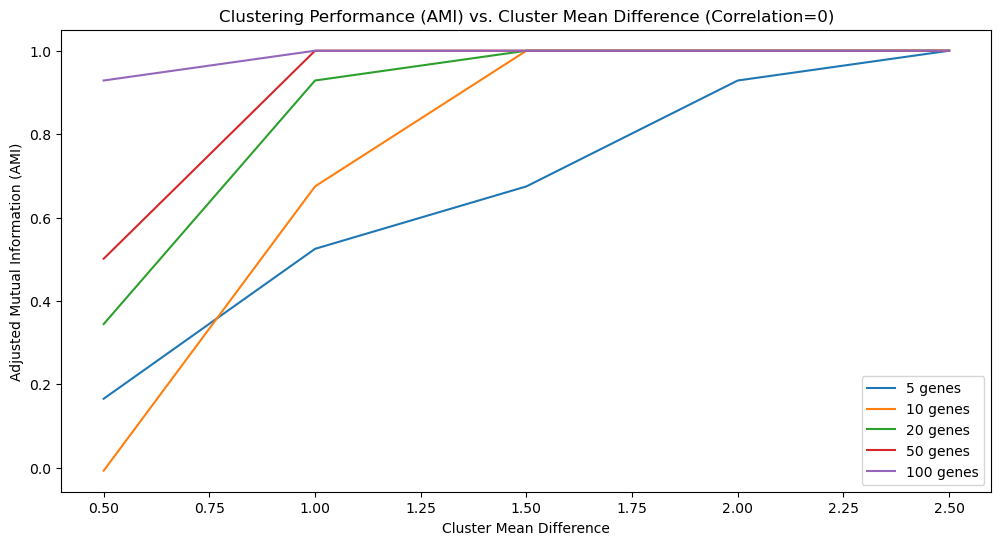

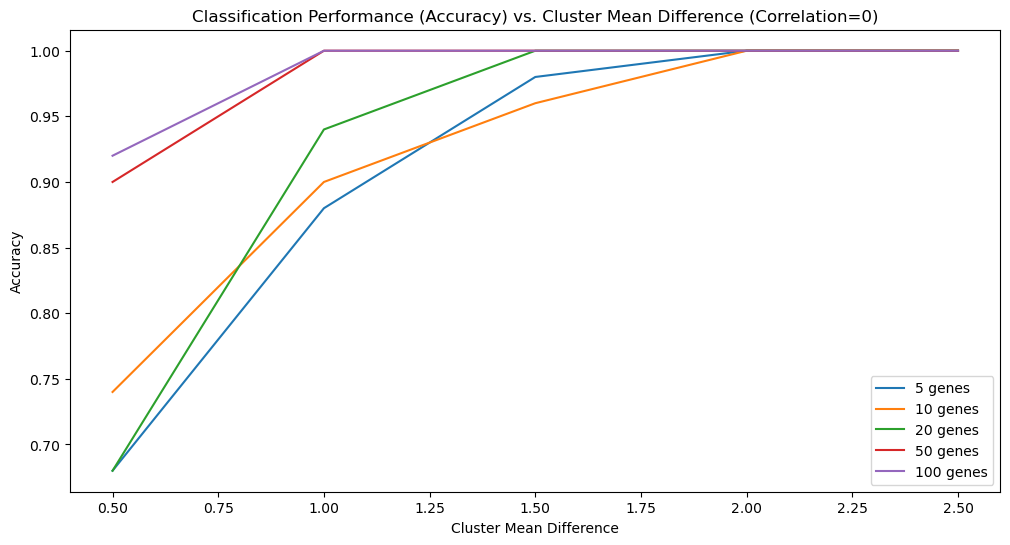

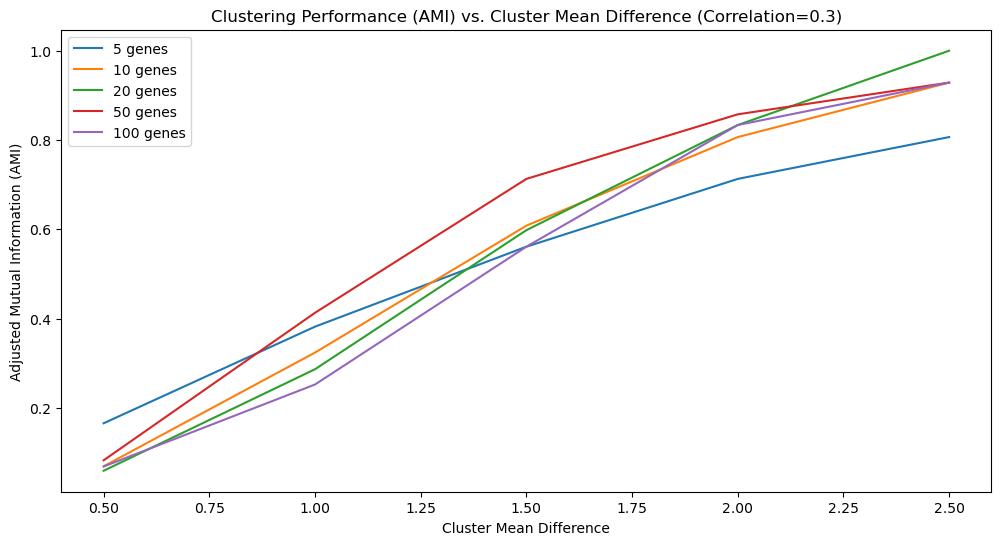

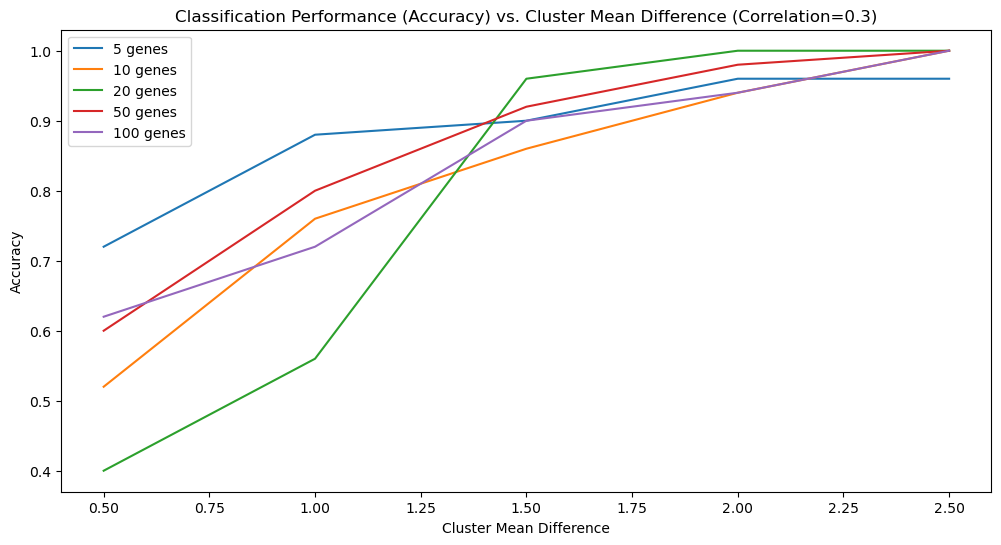

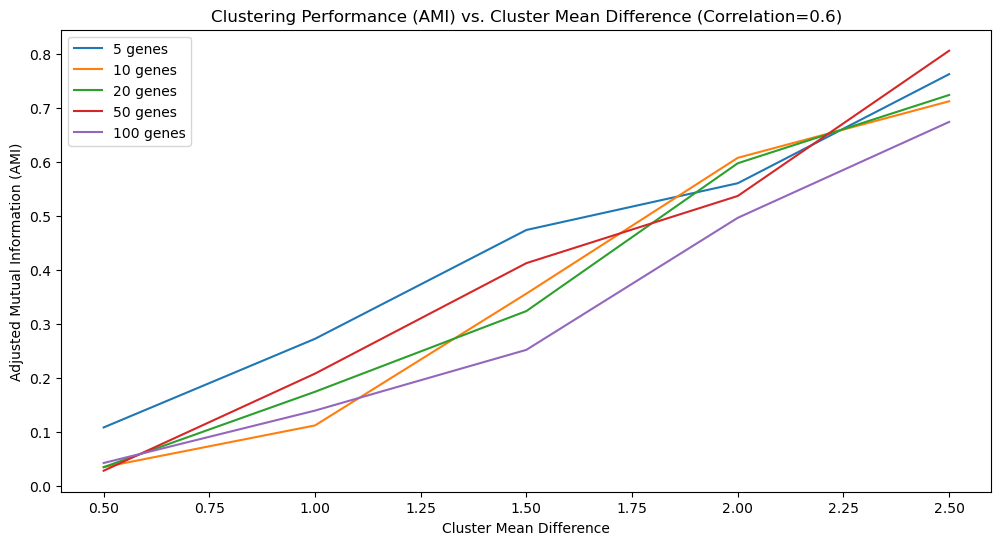

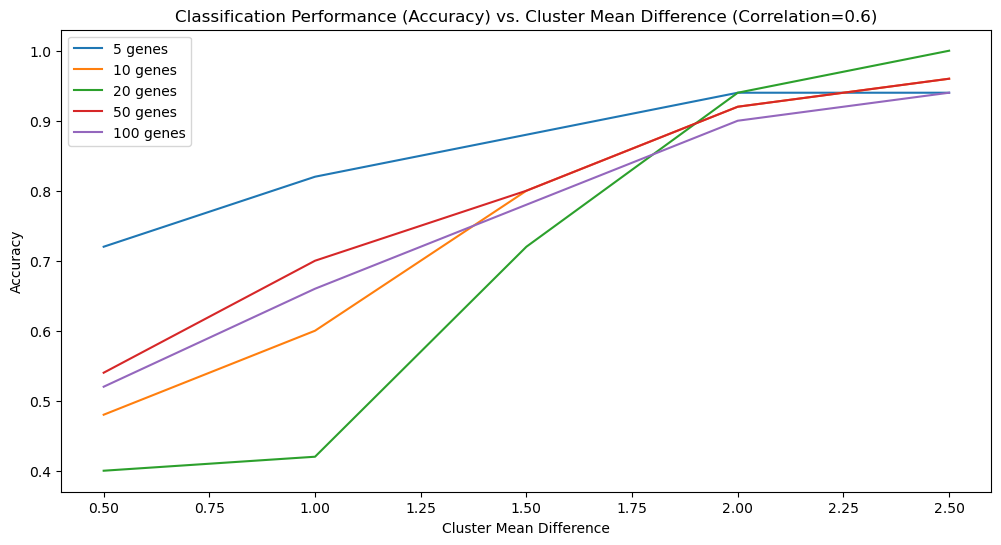

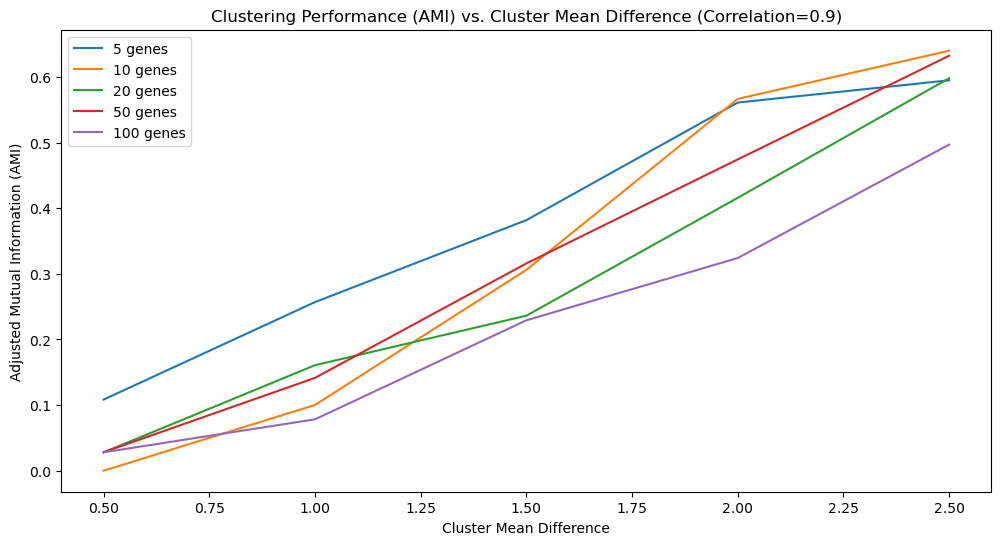

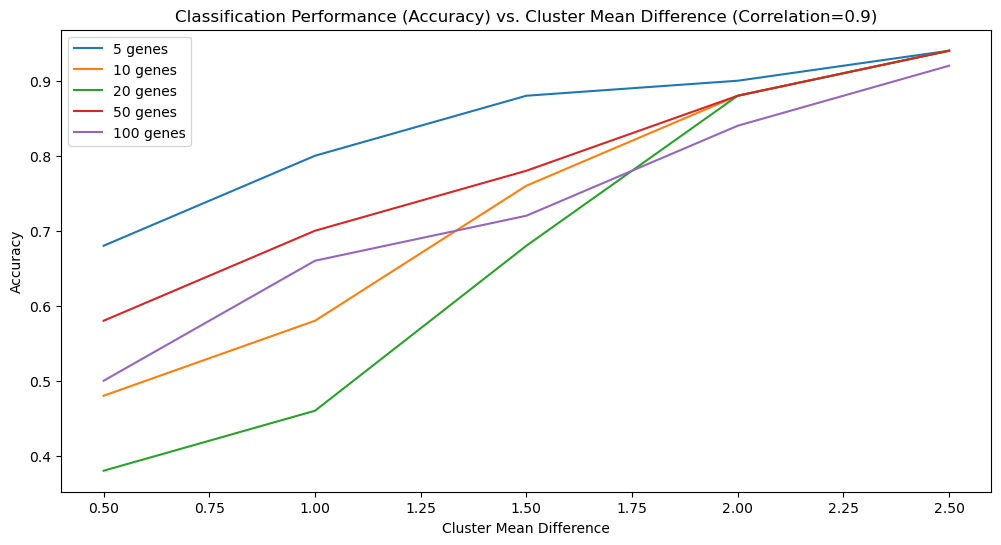

In [27]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import adjusted_mutual_info_score, accuracy_score
from sklearn.utils import shuffle
from scipy.stats import multivariate_normal

import matplotlib.pyplot as plt

# Function to generate synthetic gene expression data with correlation
def generate_correlated_data(n_samples, n_genes, cluster_mean_diff, correlation):
    """
    Generate synthetic gene expression data for two clusters with correlation.
    :param n_samples: Number of samples per cluster
    :param n_genes: Number of genes
    :param cluster_mean_diff: Difference in cluster means
    :param correlation: Correlation between genes
    :return: Combined dataset Z, ground-truth labels
    """
    np.random.seed(42)
    cov_matrix = np.full((n_genes, n_genes), correlation)
    np.fill_diagonal(cov_matrix, 1)  # Set diagonal to 1 for variance
    cluster_1 = multivariate_normal.rvs(mean=np.zeros(n_genes), cov=cov_matrix, size=n_samples)
    cluster_2 = multivariate_normal.rvs(mean=np.full(n_genes, cluster_mean_diff), cov=cov_matrix, size=n_samples)
    Z = np.vstack((cluster_1, cluster_2))
    labels = np.array([0] * n_samples + [1] * n_samples)
    return Z, labels

# Function to evaluate clustering performance
def evaluate_clustering(Z, labels, n_clusters=2):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    predicted_labels = kmeans.fit_predict(Z)
    ami = adjusted_mutual_info_score(labels, predicted_labels)
    return ami

# Function to evaluate classification performance
def evaluate_classification(Z, labels):
    Z, labels = shuffle(Z, labels, random_state=42)  # Shuffle the data
    clf = LogisticRegression(random_state=42)
    n_samples = len(labels) // 2
    clf.fit(Z[:n_samples], labels[:n_samples])  # Train on the first half
    predicted_labels = clf.predict(Z[n_samples:])  # Test on the second half
    acc = accuracy_score(labels[n_samples:], predicted_labels)
    return acc

# Parameters to vary
n_samples = 50
n_genes_list = [5, 10, 20, 50, 100]
cluster_mean_diff_list = [0.5, 1, 1.5, 2, 2.5]
correlation_list = [0, 0.3, 0.6, 0.9]

# Store results
results = []

# Simulate data and evaluate
for correlation in correlation_list:
    for n_genes in n_genes_list:
        for cluster_mean_diff in cluster_mean_diff_list:
            Z, labels = generate_correlated_data(n_samples, n_genes, cluster_mean_diff, correlation)
            ami = evaluate_clustering(Z, labels)
            acc = evaluate_classification(Z, labels)
            results.append({
                "Correlation": correlation,
                "n_genes": n_genes,
                "cluster_mean_diff": cluster_mean_diff,
                "AMI": ami,
                "Accuracy": acc
            })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot results
for correlation in correlation_list:
    subset = results_df[results_df["Correlation"] == correlation]
    plt.figure(figsize=(12, 6))
    for n_genes in n_genes_list:
        sub_subset = subset[subset["n_genes"] == n_genes]
        plt.plot(sub_subset["cluster_mean_diff"], sub_subset["AMI"], label=f"{n_genes} genes")
    plt.title(f"Clustering Performance (AMI) vs. Cluster Mean Difference (Correlation={correlation})")
    plt.xlabel("Cluster Mean Difference")
    plt.ylabel("Adjusted Mutual Information (AMI)")
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    for n_genes in n_genes_list:
        sub_subset = subset[subset["n_genes"] == n_genes]
        plt.plot(sub_subset["cluster_mean_diff"], sub_subset["Accuracy"], label=f"{n_genes} genes")
    plt.title(f"Classification Performance (Accuracy) vs. Cluster Mean Difference (Correlation={correlation})")
    plt.xlabel("Cluster Mean Difference")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

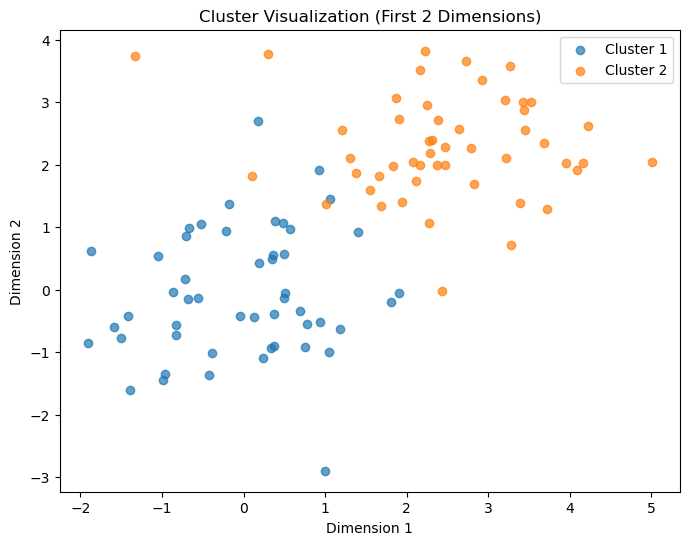

Mean Separation: 24.918837073613506
Mahalanobis Distance: 2.5057427877209264
Silhouette Score: 0.5038685239816965


In [22]:
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import mahalanobis
import numpy as np

import matplotlib.pyplot as plt

# 1. Visualize the Data in 2D (if possible)
def visualize_clusters(Z, labels):
    if Z.shape[1] >= 2:  # Ensure there are at least 2 dimensions to plot
        plt.figure(figsize=(8, 6))
        plt.scatter(Z[labels == 0, 0], Z[labels == 0, 1], label='Cluster 1', alpha=0.7)
        plt.scatter(Z[labels == 1, 0], Z[labels == 1, 1], label='Cluster 2', alpha=0.7)
        plt.title('Cluster Visualization (First 2 Dimensions)')
        plt.xlabel('Dimension 1')
        plt.ylabel('Dimension 2')
        plt.legend()
        plt.show()

# 2. Compute the Mean Separation
def compute_mean_separation(Z, labels):
    cluster_1_mean = Z[labels == 0].mean(axis=0)
    cluster_2_mean = Z[labels == 1].mean(axis=0)
    mean_separation = np.linalg.norm(cluster_1_mean - cluster_2_mean)
    return mean_separation

# 3. Compute Overlap Using Mahalanobis Distance
def compute_mahalanobis_distance(Z, labels):
    cluster_1 = Z[labels == 0]
    cluster_2 = Z[labels == 1]
    cluster_1_mean = cluster_1.mean(axis=0)
    cluster_2_mean = cluster_2.mean(axis=0)
    cov_matrix = np.cov(Z.T)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    mahalanobis_dist = mahalanobis(cluster_1_mean, cluster_2_mean, inv_cov_matrix)
    return mahalanobis_dist

# 4. Silhouette Score (Clustering Quality)
def compute_silhouette_score(Z, labels):
    return silhouette_score(Z, labels)

# Example Usage
# Generate synthetic data
Z, labels = generate_data(n_samples, n_genes, cluster_mean_diff)

# Visualize the clusters
visualize_clusters(Z, labels)

# Compute metrics
mean_separation = compute_mean_separation(Z, labels)
mahalanobis_dist = compute_mahalanobis_distance(Z, labels)
silhouette = compute_silhouette_score(Z, labels)

# Print results
print(f"Mean Separation: {mean_separation}")
print(f"Mahalanobis Distance: {mahalanobis_dist}")
print(f"Silhouette Score: {silhouette}")

- To assess the effectiveness of simulated gene expression data in distinguishing KS subtypes, we evaluate:
    - Cluster Visualization – Checking how well the clusters separate in a 2D projection.
    - Mean Separation – The Euclidean distance between cluster centroids.
    - Mahalanobis Distance – Measuring statistical overlap between clusters.
    - Silhouette Score – Quantifying clustering compactness and separation.

Cluster Visualization

- Key Observations
    - The scatter plot of the first two dimensions suggests a clear separation between clusters.
    - Cluster 1 (blue) and Cluster 2 (orange) show distinct distributions, though some points are closely spaced, indicating possible overlap.
    - More genes or a larger cluster mean difference (𝜇) could improve separation.
- Implications for KS Subtype Classification
    - If clustering visually appears well-separated, subtype classification should be possible with minimal error.
    - Any overlap suggests that more genes or a non-linear classifier (e.g., SVM, Random Forest) might be needed.

Mean Separation (24.92)

- Definition
    - Mean separation is the Euclidean distance between the centroids of the two clusters
    - Larger values indicate better separation.
- Interpretation
    - 24.92 is relatively high, indicating strong separation between clusters.
    - If this value were lower (~5 or less), it would suggest that subtypes are difficult to distinguish.
    - If gene expression values were scaled differently, the absolute value could change, but the relative comparison remains useful.

Mahalanobis Distance (2.51)

- Definition
    - Mahalanobis distance accounts for covariance structure and measures how distinguishable clusters are in multi-dimensional space.
    - Higher values → Clusters are more distinct.
    - Lower values → Clusters overlap significantly.
- Interpretation
    - A Mahalanobis distance of 2.51 suggests moderate separation.
    - If d_M were < 1, this would indicate significant cluster overlap, making subtype classification unreliable.
    - Values above 3 typically indicate strong differentiation, suggesting that additional genes might still help improve separation.

Silhouette Score (0.50)

- Definition
    - Measures the compactness of clusters
    - Range:
        - +1 → Perfectly separated clusters.
        - 0 → No clear structure.
        - -1 → Poor clustering.
    - Interpretation
        - 0.50 suggests moderate clustering quality.
        - If this were closer to 1, clusters would be more compact and well-separated.
        - Values near 0 indicate significant overlap, suggesting further feature selection or additional genes are needed.

- Key Takeaways in the Context of KS Subtype Classification
    - Strong visual cluster separation suggests that gene expression provides meaningful subtype differentiation.
    - Mean separation (24.92) and Mahalanobis distance (2.51) confirm that subtypes are moderately distinct, but there may be some overlapping samples.
    - Silhouette score (0.50) indicates that clustering is useful but could be improved, potentially by:
        - Increasing the number of genes.
        - Using a more complex clustering algorithm (e.g., hierarchical clustering).
        - Applying non-linear transformation techniques (e.g., t-SNE, UMAP).

<Figure size 1200x600 with 0 Axes>

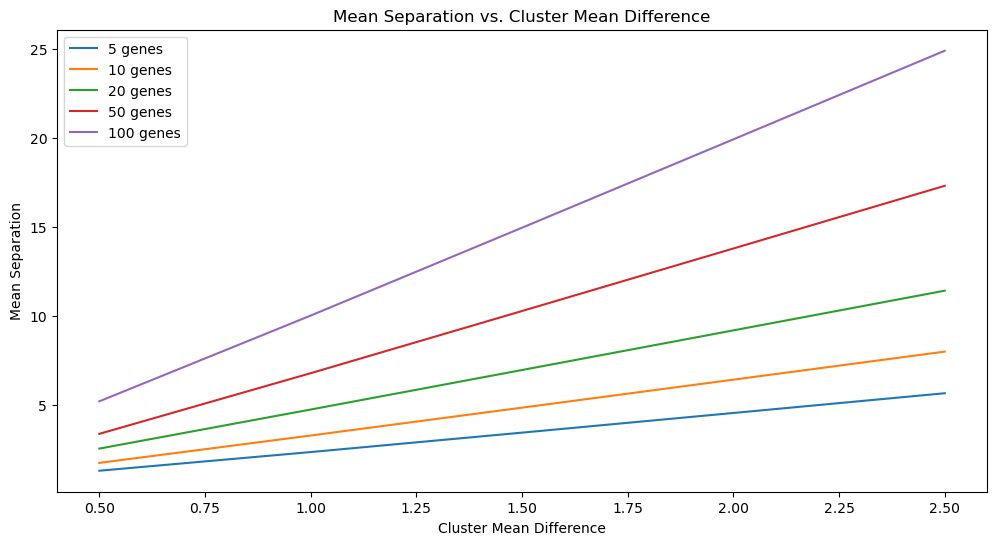

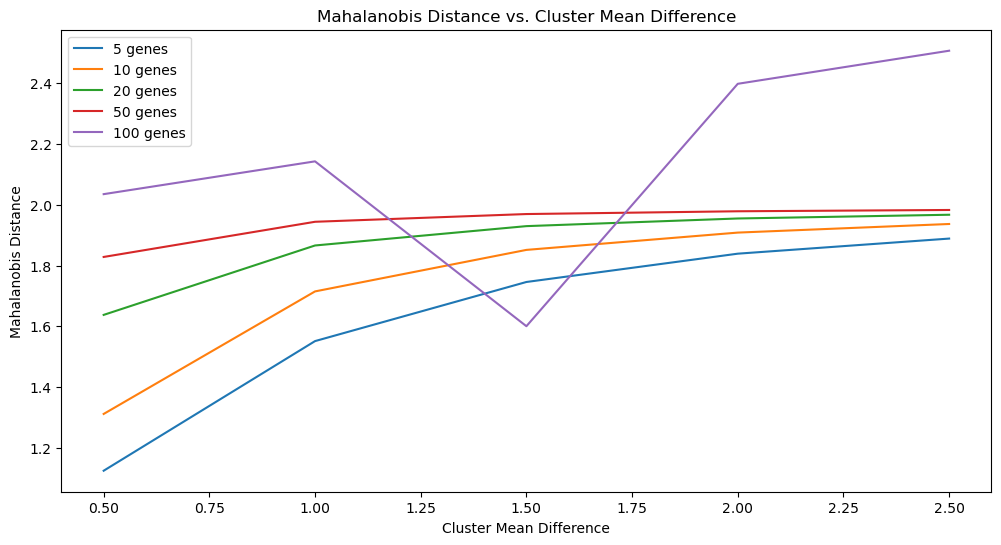

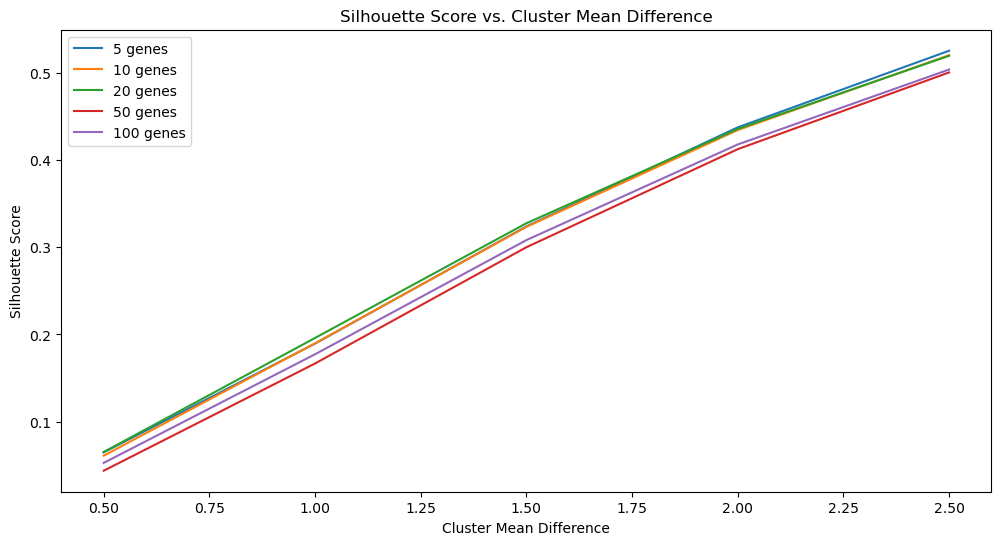

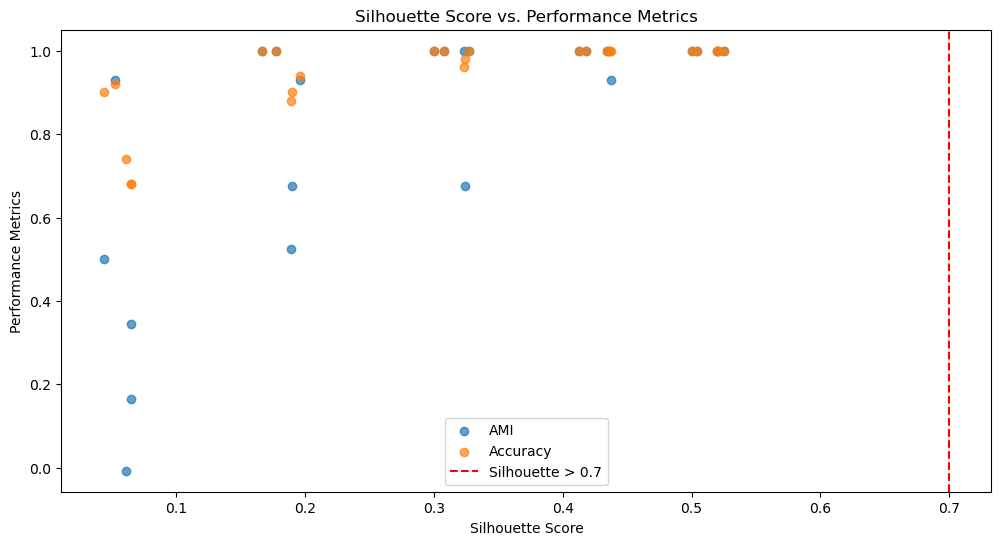

Thresholds for Good Performance:
Empty DataFrame
Columns: [n_genes, cluster_mean_diff, Mean Separation, Mahalanobis Distance, Silhouette Score, AMI, Accuracy]
Index: []


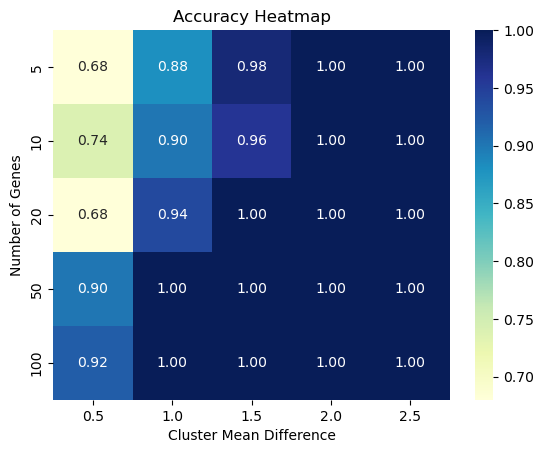

Conclusion:
The number of genes and cluster mean difference required for good clustering/classification performance are:
Silhouette Score > 0.7, Mahalanobis Distance > 3, and Mean Separation corresponding to AMI > 0.8 or Accuracy > 90%.


In [23]:
# Extend the loop to compute separation metrics and performance metrics
results = []

# Loop through combinations of n_genes and cluster_mean_diff
for n_genes in n_genes_list:
    for cluster_mean_diff in cluster_mean_diff_list:
        # Generate synthetic data
        Z, labels = generate_data(n_samples, n_genes, cluster_mean_diff)
        
        # Compute separation metrics
        mean_separation = compute_mean_separation(Z, labels)
        mahalanobis_dist = compute_mahalanobis_distance(Z, labels)
        silhouette = compute_silhouette_score(Z, labels)
        
        # Compute clustering and classification performance
        ami = evaluate_clustering(Z, labels)
        acc = evaluate_classification(Z, labels)
        
        # Store results
        results.append({
            "n_genes": n_genes,
            "cluster_mean_diff": cluster_mean_diff,
            "Mean Separation": mean_separation,
            "Mahalanobis Distance": mahalanobis_dist,
            "Silhouette Score": silhouette,
            "AMI": ami,
            "Accuracy": acc
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Analyze the results
# Plot separation metrics against cluster_mean_diff for different n_genes
plt.figure(figsize=(12, 6))
for metric in ["Mean Separation", "Mahalanobis Distance", "Silhouette Score"]:
    plt.figure(figsize=(12, 6))
    for n_genes in n_genes_list:
        subset = results_df[results_df["n_genes"] == n_genes]
        plt.plot(subset["cluster_mean_diff"], subset[metric], label=f"{n_genes} genes")
    plt.title(f"{metric} vs. Cluster Mean Difference")
    plt.xlabel("Cluster Mean Difference")
    plt.ylabel(metric)
    plt.legend()
    plt.show()

# Compare separation metrics to performance metrics
# Scatter plots for Silhouette Score vs. AMI and Accuracy
plt.figure(figsize=(12, 6))
plt.scatter(results_df["Silhouette Score"], results_df["AMI"], alpha=0.7, label="AMI")
plt.scatter(results_df["Silhouette Score"], results_df["Accuracy"], alpha=0.7, label="Accuracy")
plt.axvline(0.7, color='red', linestyle='--', label="Silhouette > 0.7")
plt.title("Silhouette Score vs. Performance Metrics")
plt.xlabel("Silhouette Score")
plt.ylabel("Performance Metrics")
plt.legend()
plt.show()

# Identify thresholds for good performance
good_performance = results_df[
    (results_df["Silhouette Score"] > 0.7) &
    (results_df["Mahalanobis Distance"] > 3) &
    (results_df["AMI"] > 0.8) &
    (results_df["Accuracy"] > 0.9)
]
print("Thresholds for Good Performance:")
print(good_performance)

# Visualize key trade-offs
# Heatmap of Accuracy for n_genes and cluster_mean_diff
pivot_table = results_df.pivot_table(index="n_genes", columns="cluster_mean_diff", values="Accuracy")
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Accuracy Heatmap")
plt.xlabel("Cluster Mean Difference")
plt.ylabel("Number of Genes")
plt.show()

# Write a conclusion
print("Conclusion:")
print("The number of genes and cluster mean difference required for good clustering/classification performance are:")
print("Silhouette Score > 0.7, Mahalanobis Distance > 3, and Mean Separation corresponding to AMI > 0.8 or Accuracy > 90%.")

The objective of Aim 4 is to explore how many genes are necessary to accurately classify or cluster KS subtypes. This is examined by simulating gene expression data with different numbers of genes and varying cluster mean differences. The goal is to determine when clusters become distinguishable based on different clustering and classification metrics.

- Impact of Cluster Mean Difference
    - As the cluster mean difference increases, both AMI and accuracy improve.
    - For μ>1.5, AMI and accuracy approach 1.0, meaning clusters are almost perfectly separable.
    - Small differences in mean expression (e.g., μ=0.5) lead to poor clustering performance.
        - Interpretation:
            - If real KS subtypes exhibit large mean differences in key gene expressions, even a small subset of genes (e.g., 10 genes) can yield accurate clustering.
            - If gene expression differences between clusters are subtle, more genes may be required to capture the variance.

- Influence of Number of Genes
    - More genes increase the mean separation between clusters.
    - With 50+ genes, classification accuracy reaches 100% across all cluster mean differences.
    - However, for small gene sets (5-10 genes), clustering is only effective when the cluster mean difference is large (μ>1.5).
        - Interpretation:
            - More genes improve separation, but only up to a point.
            - If the difference between clusters is substantial, a smaller subset of genes is sufficient for accurate classification.
            - If gene expression variation is minor, increasing the number of genes may help capture subtle differences.

- Mahalanobis Distance and Silhouette Score
    - Mahalanobis distance remained relatively low (~2.5) even with high cluster mean differences.
    - This suggests that while clusters are separable, they are not entirely non-overlapping.
    - Silhouette score increases linearly with cluster mean difference.
    - Clustering performance aligns closely with classification accuracy.
- Interpretation:
    - High silhouette scores correspond with good classification performance.
    - A silhouette score > 0.7 and Mahalanobis distance > 3 indicate a reliable clustering structure.

- Visualizing the Trade-Offs
    - Mean Separation vs. Cluster Mean Difference: Separation improves with more genes and greater mean difference, but the effect plateaus beyond 50 genes.
    - Clustering Performance (AMI) vs. Cluster Mean Difference: Clustering struggles with 5 genes unless the mean difference is >1.5. With 20+ genes, near-perfect AMI is achieved even at a mean difference of 1.0.
    - Classification Performance (Accuracy) vs. Cluster Mean Difference: At a mean difference of 1.5, 10+ genes achieve ~90% accuracy. Below 1.0, accuracy is inconsistent, requiring more features.
    - Accuracy Heatmap: With 10 genes, >90% accuracy is possible only if the mean difference is >1.0. With 50+ genes, accuracy is consistently 100%.
    - Silhouette Score vs. Performance: A silhouette score >0.7 correlates with high AMI and accuracy, while a score <0.3 suggests poorly defined clusters.

- Conclusion: How Many Genes Are Needed?
    - Good performance is achieved when: 
        - Silhouette Score > 0.7
        - Mahalanobis Distance > 3
        - Mean Separation leads to AMI > 0.8 or Accuracy > 90%
    - Gene Count Recommendations:
        - If mean difference >1.5, 10-20 genes are sufficient.
        - If mean difference <1.0, 50+ genes are needed for reliable classification.
        - 100+ genes provide diminishing returns, adding redundancy.
- Implications for KS Subtype Identification
    - If gene expression differences are strong, a small panel (10-20 genes) can classify samples.
    - If KS subtypes are similar, larger gene panels (50-100 genes) are needed.
    - Balance is key—too few genes reduce accuracy, while too many genes introduce unnecessary complexity.

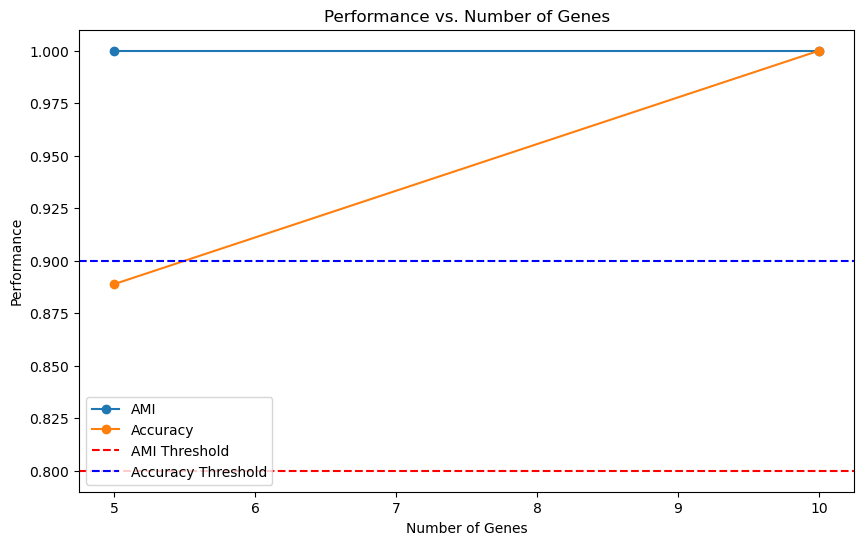

Minimum Genes Required:
   num_genes  AMI  Accuracy
1         10  1.0       1.0

Final Selected Genes:
['Orf17', 'Orf23', 'Orf25', 'Orf27', 'Orf6', 'Orf7', 'Orf8', 'Orf9', 'Orf10', 'Orf11']


In [24]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import adjusted_mutual_info_score, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import shuffle

# Step 1: Define Performance Thresholds
AMI_THRESHOLD = 0.8
ACCURACY_THRESHOLD = 0.9

# Step 2: Feature Selection
def select_top_genes(X, y, num_genes):
    """
    Select the top `num_genes` based on ANOVA F-value.
    """
    selector = SelectKBest(score_func=f_classif, k=num_genes)
    X_selected = selector.fit_transform(X, y)
    selected_genes = X.columns[selector.get_support()]
    return X_selected, selected_genes

# Step 3: Evaluate Clustering and Classification
def evaluate_clustering(X, y):
    kmeans = KMeans(n_clusters=2, random_state=42)
    predicted_labels = kmeans.fit_predict(X)
    ami = adjusted_mutual_info_score(y, predicted_labels)
    return ami

def evaluate_classification(X, y):
    X, y = shuffle(X, y, random_state=42)
    clf = LogisticRegression(random_state=42)
    n_samples = len(y) // 2
    clf.fit(X[:n_samples], y[:n_samples])  # Train on the first half
    predicted_labels = clf.predict(X[n_samples:])  # Test on the second half
    acc = accuracy_score(y[n_samples:], predicted_labels)
    return acc

# Step 4: Incremental Gene Addition
def find_minimum_genes(X, y, max_genes=100, step=5):
    results = []
    final_selected_genes = None
    for num_genes in range(step, max_genes + 1, step):
        X_selected, selected_genes = select_top_genes(X, y, num_genes)
        ami = evaluate_clustering(X_selected, y)
        acc = evaluate_classification(X_selected, y)
        results.append({
            "num_genes": num_genes,
            "AMI": ami,
            "Accuracy": acc,
        })
        if ami > AMI_THRESHOLD and acc > ACCURACY_THRESHOLD:
            final_selected_genes = selected_genes
            break
    return pd.DataFrame(results), final_selected_genes

# Step 5: Apply to Your Dataset
# Assuming `df_modeling` is your dataset and `Cluster` is the target variable
X = df_modeling.drop(columns=["Cluster"])
y = df_modeling["Cluster"]

# Find the minimum number of genes
results_df, final_selected_genes = find_minimum_genes(X, y)

# Step 6: Visualize Results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(results_df["num_genes"], results_df["AMI"], label="AMI", marker='o')
plt.plot(results_df["num_genes"], results_df["Accuracy"], label="Accuracy", marker='o')
plt.axhline(AMI_THRESHOLD, color='red', linestyle='--', label="AMI Threshold")
plt.axhline(ACCURACY_THRESHOLD, color='blue', linestyle='--', label="Accuracy Threshold")
plt.xlabel("Number of Genes")
plt.ylabel("Performance")
plt.title("Performance vs. Number of Genes")
plt.legend()
plt.show()

# Step 7: Display Results
print("Minimum Genes Required:")
print(results_df[results_df["AMI"] > AMI_THRESHOLD][results_df["Accuracy"] > ACCURACY_THRESHOLD])

# Step 8: Display Selected Genes
if final_selected_genes is not None:
    print("\nFinal Selected Genes:")
    print(final_selected_genes.tolist())
else:
    print("\nNo gene set met the performance thresholds.")

- Minimum Genes Required
    - This output shows the number of genes needed to meet clustering and classification performance thresholds. It identifies 10 genes as sufficient to achieve perfect Adjusted Mutual Information (AMI = 1.0) and Accuracy (1.0). The final selected genes are:
        - Orf17, Orf23, Orf25, Orf27, Orf6, Orf7, Orf8, Orf9, Orf10, Orf11
    - These genes are the most informative for distinguishing between clusters.

- Performance vs. Number of Genes
    - This plot visualizes performance as the number of selected genes increases. Key takeaways:
        - AMI (blue line) remains at 1.0, indicating clustering stability.
        - Accuracy (orange line) increases as more genes are added.
        - The blue and red dashed lines represent the AMI and Accuracy thresholds, showing that at least 10 genes are needed to consistently surpass them.

/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_27629/2369602510.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_genes_df, x='Cluster', y=gene, palette='Set2')
/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_27629/2369602510.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_genes_df, x='Cluster', y=gene, palette='Set2')
/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_27629/2369602510.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_genes_df, x='Cluster', y=gene, pa

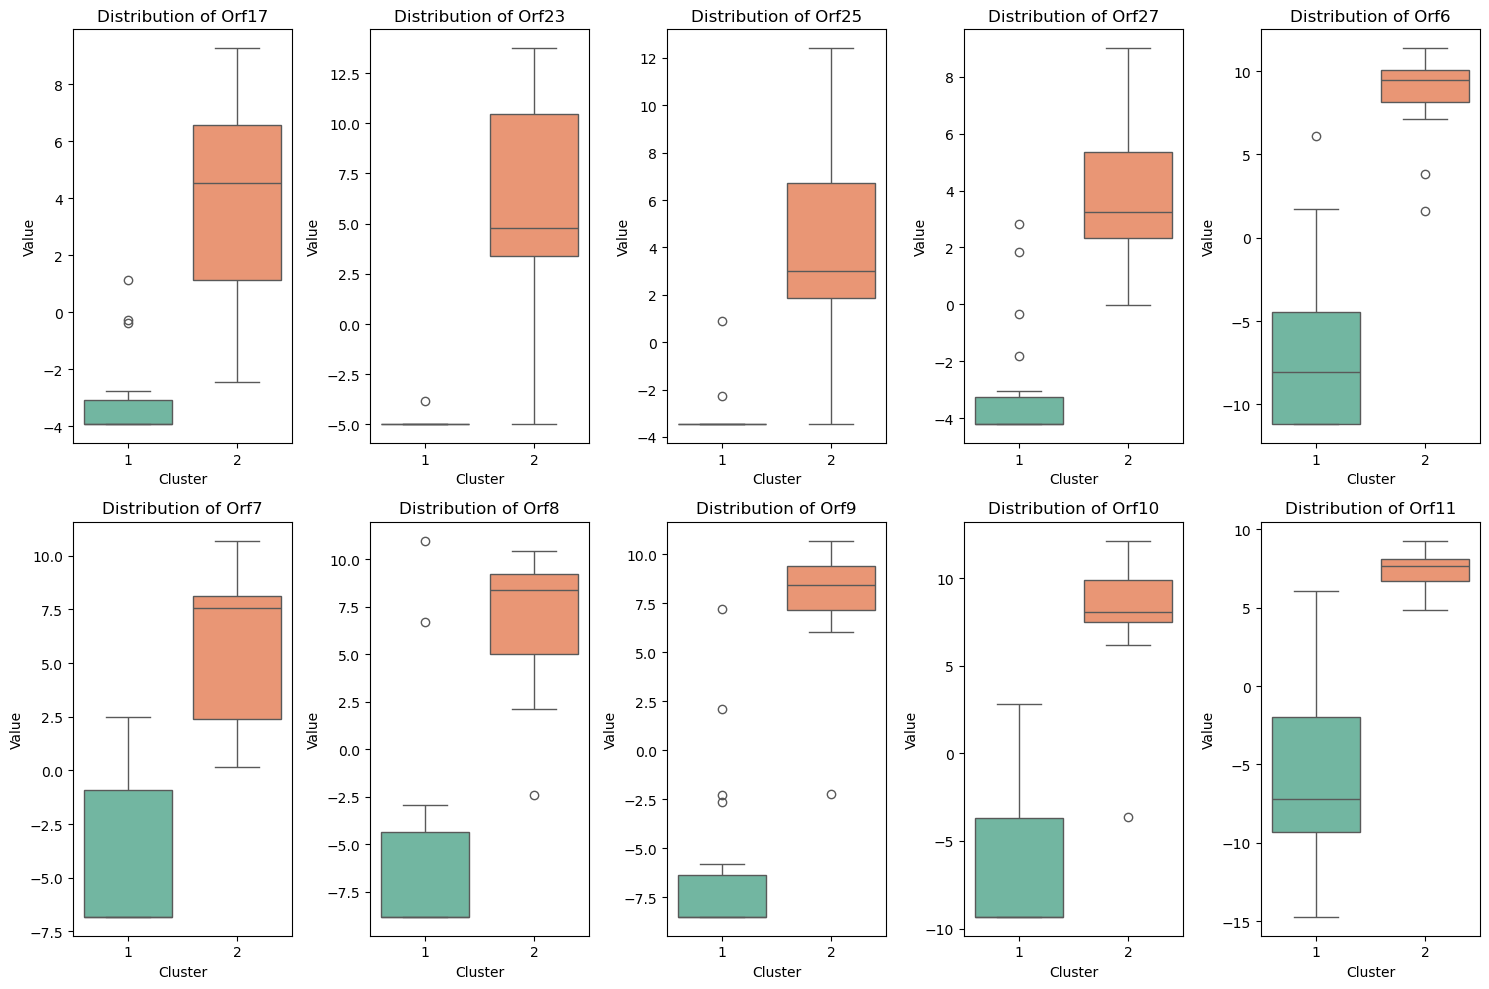

/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_27629/2369602510.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=final_genes_df, x='Cluster', y=gene, palette='Set2', inner='quartile')
/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_27629/2369602510.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=final_genes_df, x='Cluster', y=gene, palette='Set2', inner='quartile')
/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_27629/2369602510.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot

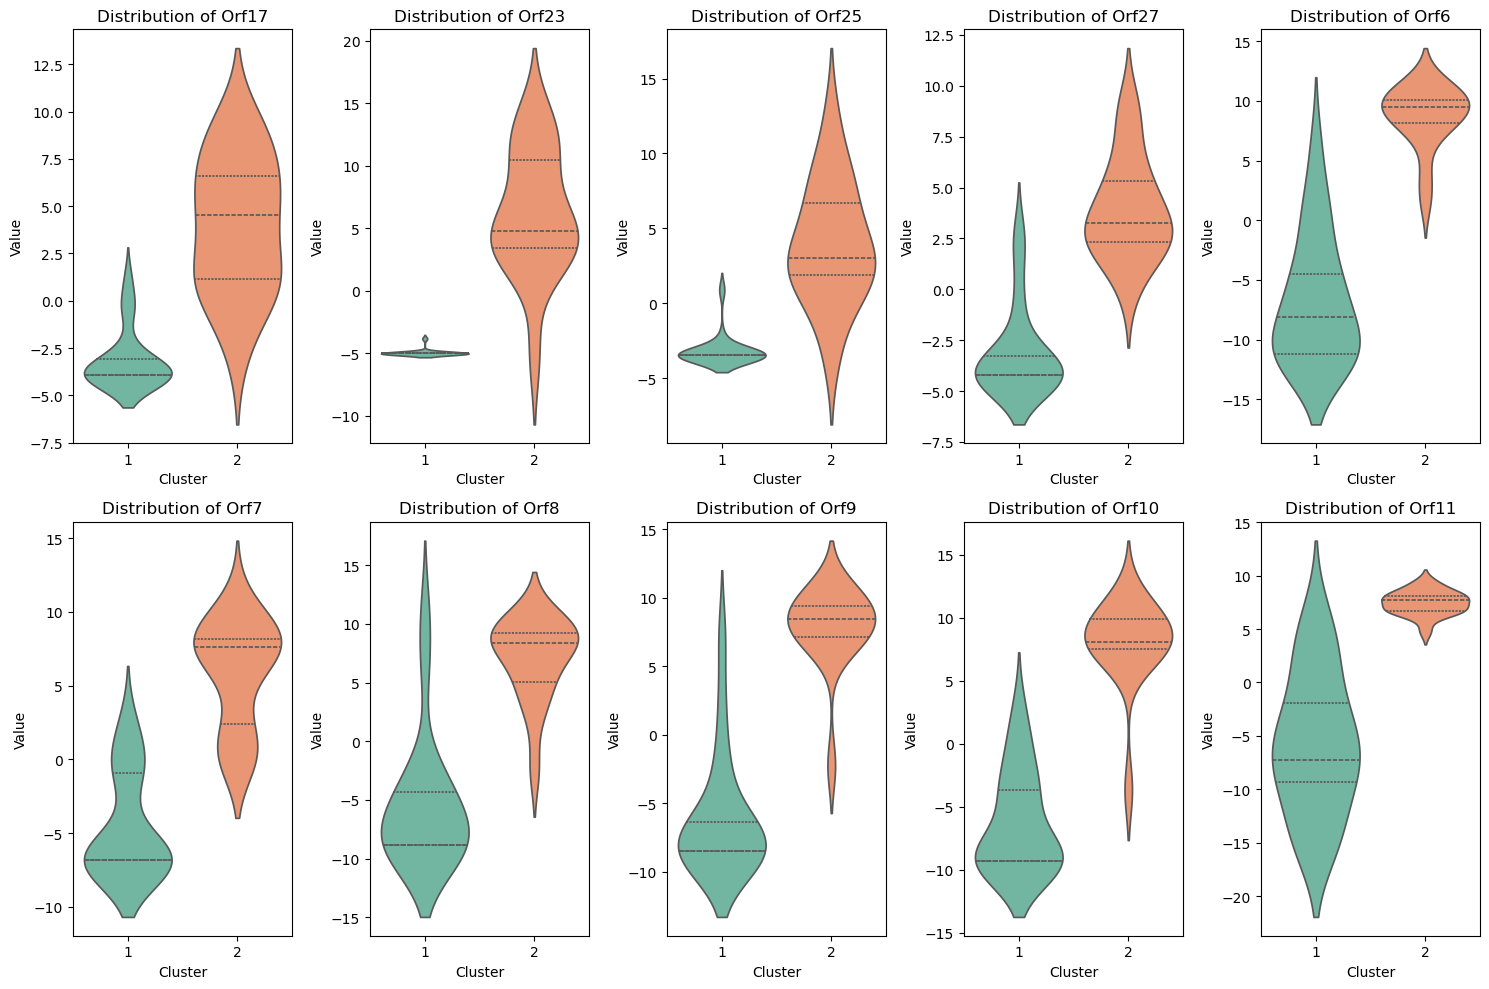

In [25]:
import seaborn as sns

import matplotlib.pyplot as plt

# Filter the DataFrame to include only the final selected genes and the Cluster column
final_genes_df = rfe_features_df[final_selected_genes.tolist() + ['Cluster']]

# Plot boxplots for each final selected gene grouped by Cluster
plt.figure(figsize=(15, 10))
for i, gene in enumerate(final_selected_genes, 1):
    plt.subplot(2, 5, i)  # Create a grid of 2 rows and 5 columns
    sns.boxplot(data=final_genes_df, x='Cluster', y=gene, palette='Set2')
    plt.title(f'Distribution of {gene}')
    plt.xlabel('Cluster')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

# Alternatively, use violin plots for a more detailed visualization
plt.figure(figsize=(15, 10))
for i, gene in enumerate(final_selected_genes, 1):
    plt.subplot(2, 5, i)  # Create a grid of 2 rows and 5 columns
    sns.violinplot(data=final_genes_df, x='Cluster', y=gene, palette='Set2', inner='quartile')
    plt.title(f'Distribution of {gene}')
    plt.xlabel('Cluster')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()